In [ ]:
"""

This script implements solutions for the programming exercises of Statistics for Data Science 20/21.

Author - Suresh Kumar Choudhary  

Course Instructor: Prof. Dirk Ostwald

"""

In [247]:
#Gerneral imports
import os                                                                       # operating system module
import sys                                                                      # system utilities
import numpy as np                                                              # numerical computing module
import scipy.stats as rv                                                        # random variable module
from scipy.stats import uniform
from scipy.stats import bernoulli
from scipy.stats import norm,chi2,binom, beta,multivariate_normal,gamma
import matplotlib.pyplot as plt                                                 # visualization module
import matplotlib.cm as cm                                                      # colormaps  
plt.close("all")                                                                # close all figures
plt.rc('text', usetex = True)                                                   # latex annotations
import matplotlib.gridspec as gridspec                                          # subplot utilities
import math
import statistics as st
from scipy.optimize import minimize
import pandas as pd
from progressbar import ProgressBar

# (1) Introduction
1. Sample a univariate Gaussian using scipy.stats.
2. Evaluate the PDF of a univariate Gaussian using scipy.stats.
3. Visualize the PDF of a univariate and a normalized sample histogram of samples from a univariate Gaussian with identical parameters on top of each other using Matplotlib.

[-1.43218809e+00  7.10115066e+00 -2.85653883e+00  9.01872584e-01
  3.88944954e-01 -5.90164083e-01  2.41542669e+00 -4.76953020e-03
  4.72807363e+00  3.31342501e+00 -1.80008741e+00  6.42037180e+00
 -4.41979354e-01  3.42399541e+00  3.13918213e-01  2.80339421e+00
  7.12482077e-01  6.93626187e-01  5.05795653e+00  4.52050468e-01
  2.86345035e+00  2.21981088e+00 -1.26010787e+00  7.77443082e-01
  1.49806966e+00  6.05176038e+00  3.03981599e+00  3.96552313e+00
  6.02857704e-01  2.83618055e+00 -7.53700991e-01  1.05531554e+00
  1.96798695e+00  4.30404432e+00  1.11497596e+00  6.87815388e+00
  8.45654911e-01  1.67882339e+00  4.20939542e-01  4.37415970e+00
 -1.19428168e-02  2.81665784e+00 -8.59832786e-02  5.37693122e+00
  9.83117090e-01  4.00822530e+00  3.20435510e-01  1.52662796e+00
 -3.33052707e+00 -7.57549239e-01  3.54026203e+00 -4.87773543e-01
  2.72828296e+00  6.08886143e+00  2.72461172e+00  3.51096437e+00
  3.03157449e+00  5.10985705e+00 -1.48082130e+00  3.06299303e+00
  3.18390920e+00  5.67678

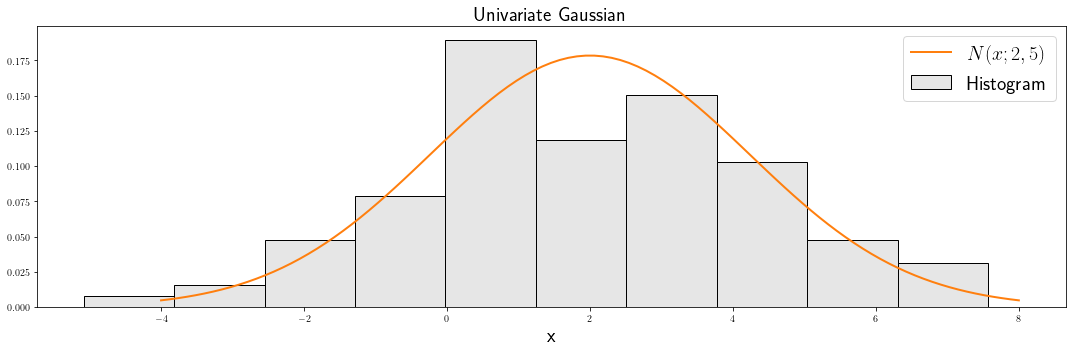

In [5]:
#initialization
n=100  #sample size
x_min=-4    #minimum x
x_max= 8   #maximum x
x_resolution=100
x=np.linspace(x_min,x_max,x_resolution) #x space
mu=2
sigmasqr=5
random_samples= rv.norm.rvs(mu, np.sqrt(sigmasqr),size=n)
print(random_samples)
fig, ax = plt.subplots(1,1,figsize=(15, 5))

ax.hist(random_samples,density=True,bins='auto',facecolor=[.9,.9,.9], edgecolor='black', linewidth=1,label='Histogram')
ax.plot(x,rv.norm.pdf(x,mu,np.sqrt(sigmasqr)),linewidth=2,label=r'$ N(x;{},{})$'.format(mu,sigmasqr))
ax.set_title('Univariate Gaussian',fontsize=20)
ax.set_xlabel(r'x',fontsize=20)
ax.legend(loc='upper right',fontsize=20)
fig.tight_layout()
plt.show()

# (2) Probability spaces


1. (Dice experiment 1) Consider the probability space model of tossing a fair dice. Let A = {2, 4, 6} and B = {1, 2, 3, 4} be two events. Then, P(A) = 1/2, P(B) = 2/3 and P(A ∩ B) = 1/3. Since P(A ∩ B) = P(A)P(B), the events A and B are independent. Simulate draws from the outcome space and verify that Pˆ(A∩B) = Pˆ(A)Pˆ(B), where Pˆ(E) denotes the proportion of times an event E occurs in the simulation.

In [65]:
#Probability spaces - Ex 1
#initialization
A = {2, 4, 6}
B = {1, 2, 3, 4}

n = 1000
cn_A = 0
cn_B = 0
cn_AB = 0

for i in range(n):

   r_number = rv.randint.rvs(1,7) #random number 
   if r_number in A and r_number in B:
     cn_AB = cn_AB + 1
   if r_number in A:
     cn_A = cn_A + 1
   if r_number in B:
     cn_B = cn_B + 1

print("Dice Experiment I-probabiltity estimation")
prob_A_B=cn_AB/n
print("Estimated Probabilty of event A and B :",prob_A_B) # P(A∩B) 
prob_A=cn_A/n
print("Estimated Probability of event A : ", prob_A)
prob_B=cn_B/n
print("Estimated Probability of event B : ", prob_B)
print("Estimated Probabilty of event A & B = P(A)P(B): ",prob_A*prob_B) #P(A)P(B)


print("So, from above we can conclude that P(A∩B) = P(A)P(B),  given events A and B are independent.")

Dice Experiment I-probabiltity estimation
Estimated Probabilty of event A and B : 0.323
Estimated Probability of event A :  0.485
Estimated Probability of event B :  0.677
Estimated Probabilty of event A & B = P(A)P(B):  0.328345
So, from above we can conclude that P(A∩B) = P(A)P(B),  given events A and B are independent.


2. (Dice experiment 2) Consider the probability space model of tossing a fair dice. Identify two events A and B that are not independent. Analytically, evaluate P(A), P(B), P(A ∩ B), P(A|B) and P(B|A) and verify these values by means of simulation.

In [66]:
#Probability spaces - Ex 2

A= [1,3,5]
B= [2,4,6]

n = np.int(1e3)
cn_A = 0
cn_B = 0
cn_AB = 0

for i in range(n):

   r_number = rv.randint.rvs(1,7) #random number
   if r_number in A and r_number in B:
     cn_AB = cn_AB + 1
   if r_number in A:
     cn_A = cn_A + 1
   if r_number in B:
     cn_B = cn_B + 1
   

print("Dice Experiment II probabilty estimation")

prob_AB=cn_AB/n
print("Estimated Probabilty (P) of event A & B :",prob_AB)
prob_A=cn_A/n
print("Estimated Probabilty (P) of event A : ", prob_A)
prob_B=cn_B/n
print("Estimated Probabilty (P) of event B : ", prob_B) 

prob_A_given_B=cn_AB/cn_B
print("Estimated Probability of event A given event B ,P(A/B): ",prob_A_given_B)
prob_B_given_A=cn_AB/cn_A
print("Estimated Probability of event B given event A ,P(B/A): ",prob_B_given_A)

Dice Experiment II probabilty estimation
Estimated Probabilty (P) of event A & B : 0.0
Estimated Probabilty (P) of event A :  0.495
Estimated Probabilty (P) of event B :  0.505
Estimated Probability of event A given event B ,P(A/B):  0.0
Estimated Probability of event B given event A ,P(B/A):  0.0


3. (Coin experiment) Consider the probability space model of tossing a fair coin twice, i.e. a uniform probability measure on Ω = {HH, HT, T H, T T}, where H indicates heads and T indicates tails. Simulate draws from this probability space and verify that the events H appears on the first toss, H appears on the second toss, and both tosses have the same outcome each have probability 1/2.

In [67]:
#Probability spaces - Ex 3 , Coin Experiment

n = np.int(1e3)
cn_SO = 0  # number of same output
cn_H1 = 0  #number of heads on toss 1
cn_H2 = 0  #number of heads on toss 2


for i in range(n):

  C = np.full((2,1), np.nan) # coin sample with head and tail 
  C[1] = rv.bernoulli.rvs(0.5) # random sample
  C[0] = rv.bernoulli.rvs(0.5) # random sample
  
  if C[0] == C[1]:
    cn_SO = cn_SO + 1
  if C[1] == 0:
    cn_H2 = cn_H2 + 1
  if C[0] == 0:
    cn_H1 = cn_H1 + 1
  
  
print('Estimated Probabilty with heads on first toss is : ', cn_H1/n)
print('Estimated Probabilty with heads on second toss is : ', cn_H2/n)
print('Estimated Proabbilty with heads on second toss is : ', cn_SO/n)

print("Hence we can verify that the events 1) H appears on the first toss 2) H appears on the second toss 3) both tosses have the same outcome- each have probability of 1/2")

Estimated Probabilty with heads on first toss is :  0.509
Estimated Probabilty with heads on second toss is :  0.496
Estimated Proabbilty with heads on second toss is :  0.497
Hence we can verify that the events 1) H appears on the first toss 2) H appears on the second toss 3) both tosses have the same outcome- each have probability of 1/2


# (3) Random variables


1. Simulate the probability space model of throwing to dice and the random variable corresponding the sum of the pips. Visualize a normalized histograms of simulated outcomes of this random variable and compare it to the theoretical prediction.

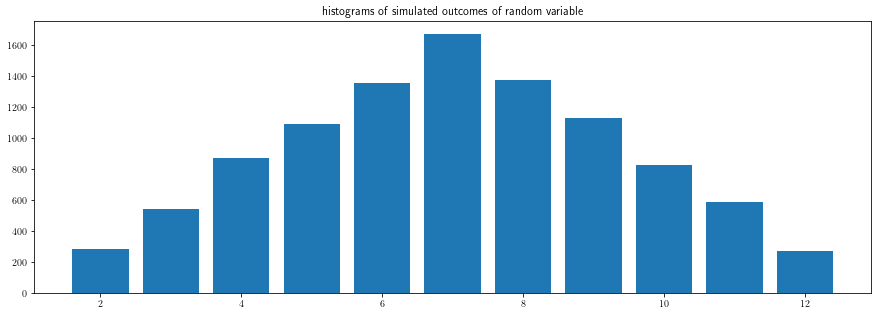

In [85]:
N = int(1e4)
dice1 = np.random.randint(low=1, high=7, size=N)
dice2 = np.random.randint(low=1, high=7, size=N)
rv = dice1 + dice2
fig, ax = plt.subplots(1,1,figsize=(15, 5))
plt.title("histograms of simulated outcomes of random variable")
plt.hist(rv, bins=np.arange(2, 14), align="left", rwidth=0.8)
plt.show()

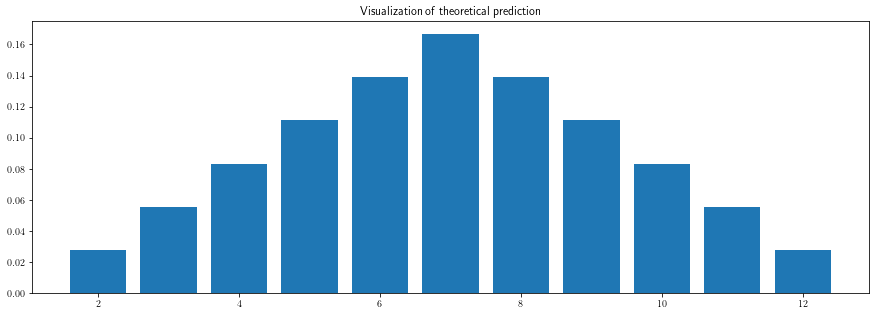

In [82]:
fig, ax = plt.subplots(1,1,figsize=(15, 5))

x=np.linspace(2,12,11)
p=np.array([1,2,3,4,5,6,5,4,3,2,1])/36

plt.title("Visualization of theoretical prediction")
plt.bar(x,p)
plt.show()

2. Visualize the PMF of a Bernoulli random variable and a normalized histogram of many samples of a Bernoulli random variable with identical parameter setting on top of each other.

Text(0, 0.5, 'Probability')

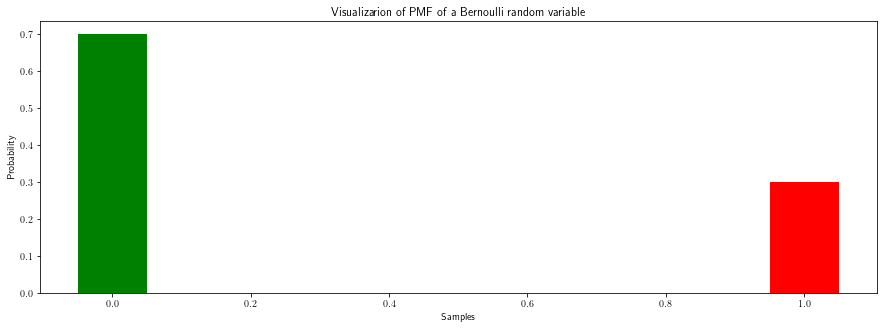

In [86]:
#Programming Ex - 2
p=0.3
x = bernoulli.rvs(p, size=100) #random samples
pmf = bernoulli.pmf(x,p) 

fig, ax = plt.subplots(1,1,figsize=(15, 5))

plt.bar(x,pmf,width=0.1,color=["r","g"])
plt.title("Visualizarion of PMF of a Bernoulli random variable")
plt.xlabel("Samples")
plt.ylabel("Probability")


Normalized histogram of many samples of a Bernoulli random variable 


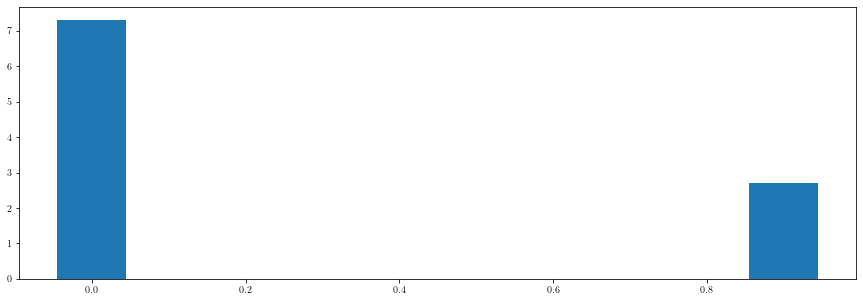

In [88]:
print("Normalized histogram of many samples of a Bernoulli random variable ")
fig, ax = plt.subplots(1,1,figsize=(15, 5))
plt.hist(x, density=True, align="left", rwidth=0.9)
plt.show()

3. Visualize the PDF of a Gaussian random variable and a normalized histogram of many samples of a Gaussian random variable with identical parameter settings on top of each other.

PDF of a Gaussian random variable and histogram of many samples of Gaussian RV


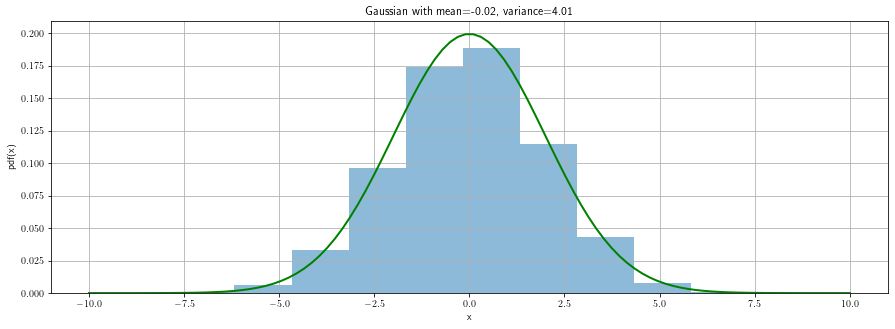

In [92]:
fig, ax = plt.subplots(1,1,figsize=(15, 5))
n=10000 #sample size
x = np.linspace(-10,10,100)  #x space
r_x = norm.rvs(scale=2,size=n) #random numbers using N(0,1)

p = norm.pdf(x,scale=2)          # generate pdf
v = np.var(r_x)
m = np.mean(r_x)

print("PDF of a Gaussian random variable and histogram of many samples of Gaussian RV")
ax.hist(r_x, bins=10, alpha=0.5, density=True)
ax.plot(x,p, 'g-', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title(f' Gaussian with mean={m:.2f}, variance={v:.2f}')
ax.grid(True)

# (4) Joint distributions


1. Write a simulation that demonstrates that the marginal distributions of a bivariate Gaussian distribution with expectation parameter 𝜇=(1,2)𝑇 and covariance matrix parameter Σ=(0.30.20.20.5) are given by univariate Gaussian distributions with expectation parameters 𝜇1=1,𝜇2=2 and variance parameters 𝜎2=0.3 and 𝜎2=0.5 , respectively. For the simulation, make use of multivariate Gaussian probability density and random number generators. Visualize and document your results.

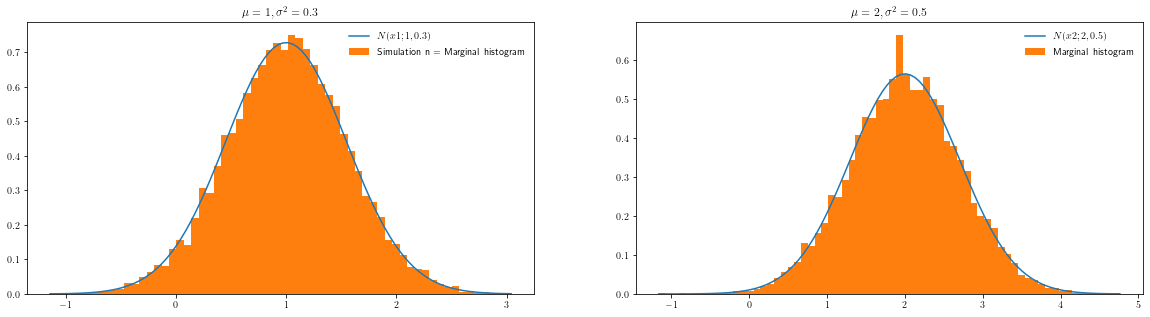

In [96]:
#Initialisation
exp = [1,2]

cov = [[0.3,0.2],
      [0.2,0.5]]
n=10000 #sample size 
sample_multi_gaussian = np.random.multivariate_normal(exp, cov, size = n) #random sample


x = sample_multi_gaussian[:,0] #X
y = sample_multi_gaussian[:,1] #Y


x_space = np.linspace(min(x), max(x), 100) #x space
y_space = np.linspace(min(y), max(y), 100) #y space

fig, axs = plt.subplots(1,2,figsize=(20, 5))
for kk, ax in enumerate(axs.reshape(-1)):
    if kk==0:
        ax.plot(x_space, norm.pdf(x_space, 1, np.sqrt(0.3)),label=r'$N (x1;1,0.3)$')
        ax.hist(x, density=True, bins = 'auto', label = "Simulation n = Marginal histogram")
        ax.legend(frameon=False)
        ax.set_title(r'$\mu = 1, \sigma^2 = 0.3$')
    else:
        ax.plot(y_space, norm.pdf(y_space, 2, np.sqrt(0.5)), label=r'$N (x2;2,0.5)$')
        ax.hist(y, density=True, bins = 'auto', label = "Marginal histogram")
        ax.legend(loc='best', frameon=False)
        ax.set_title(r'$\mu = {}, \sigma^2 = {}$'.format(2,0.5))
plt.show()

# Visualization



2. Write a simulation that verifies that obtaining samples from 2 independent univariate Gaussian distributions with parameters µi , σ2 i > 0, i = 1, 2 is equivalent to obtaining samples from a two dimensional Gaussian distribution with the appropriately specified parameters µ ∈ R 2 and Σ ∈ R 2×2 .

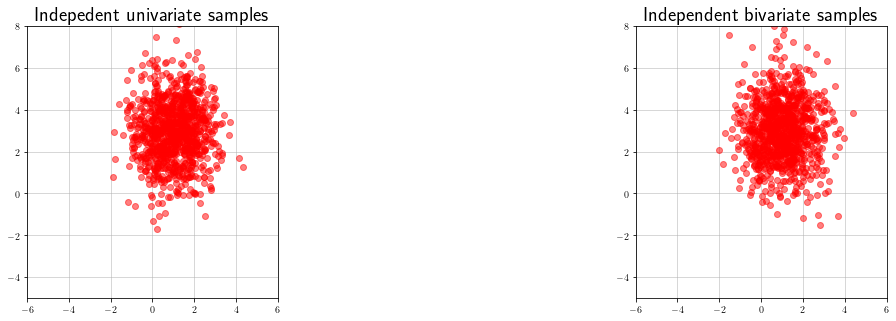

In [105]:
n = 1000
mu = [1,3]
sigsqr = [1,2]
X = np.full((n,2,2), np.nan)
subplotlab = ['Indepedent univariate samples', 'Independent bivariate samples']

#iterative univariate sampling
for i in range(n):
  for j in range(2):
      X[i,j,0] = norm.rvs(mu[j], np.sqrt(sigsqr[j]))

# non iterative bivariate sampling
Sigma = [[sigsqr[0],0], [0,sigsqr[1]]]
X[:,:,1] = multivariate_normal.rvs(mu,Sigma,n)


fig, axs = plt.subplots(1,2,figsize=(20, 5))
for i, ax in enumerate(axs.reshape(-1)):
    ax.plot( X[:,0,i], X[:,1,i], linestyle = '', marker = 'o', color = 'r', alpha = .5)
    ax.set_aspect('equal')
    ax.set_xlim(-6,6)
    ax.set_ylim(-5,8)
    ax.grid(True, linewidth = .5)
    ax.set_title(subplotlab[i], fontsize = 20)
plt.show()

#visualization


3. Write a simulation that exemplary verifies the analytical results on conditional Gaussian distributions for the case of a bivariate Gaussian distribution.

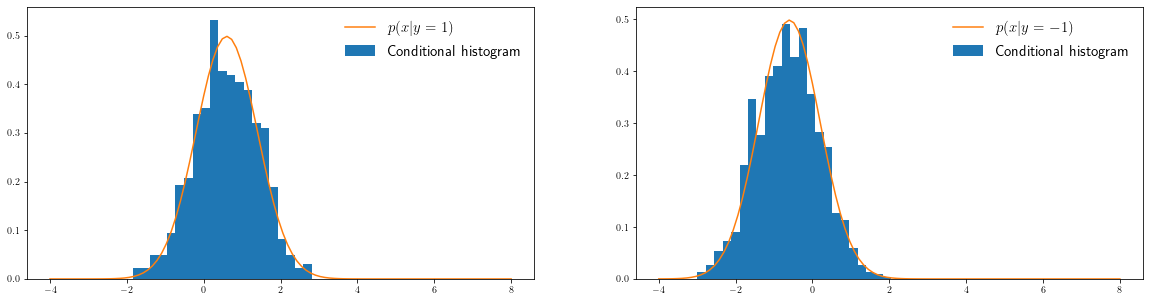

In [106]:
#Joint distr specifications
mu = [0,0]
Sigma = np.array([[1,.6],[.6,1]])

#A conditional distri specifications
x = np.linspace(-4,8,100)
y = [1,-1]
n = 1000 
S = np.full((n,2), np.nan)


#a censored bivariate sampling
for i in range(2):
  j = 0 
  while j < n:
    X = multivariate_normal.rvs(mu,Sigma) #random samples
    if X[1] > y[i] - 1e-2 and X[1] < y[i] + 1e-2:
      S[j,i] = X[0]
      j = j + 1
  

fig, axs = plt.subplots(1,2,figsize=(20, 5))
for i, ax in enumerate(axs.reshape(-1)):
  ax.hist( S[:,i],
              bins = 'auto',
              density = True,

              label = r'Conditional histogram',

              linewidth = .5)
  mu_x_giv_y = mu[0] + Sigma[0,1]*(1/Sigma[1,1])*(y[i] - mu[1])
  Sigma_x_giv_y = Sigma[0,0] - Sigma[0,1]*(1/Sigma[1,1])*Sigma[1,0]
  ax.plot(x,
           rv.norm.pdf(x,mu_x_giv_y,np.sqrt(Sigma_x_giv_y)),
           label = r"$p(x|y = {0:1.0f})$".format(y[i]))
  ax.legend(frameon = False, fontsize = 15, loc = 'upper right')
plt.show()

# (5) Transformations

<ipython-input-113-c5b1c566ce0a>:22: RuntimeWarning: divide by zero encountered in log
  ax.plot(x,-1/lamb*np.log(1-x),linewidth = 2)


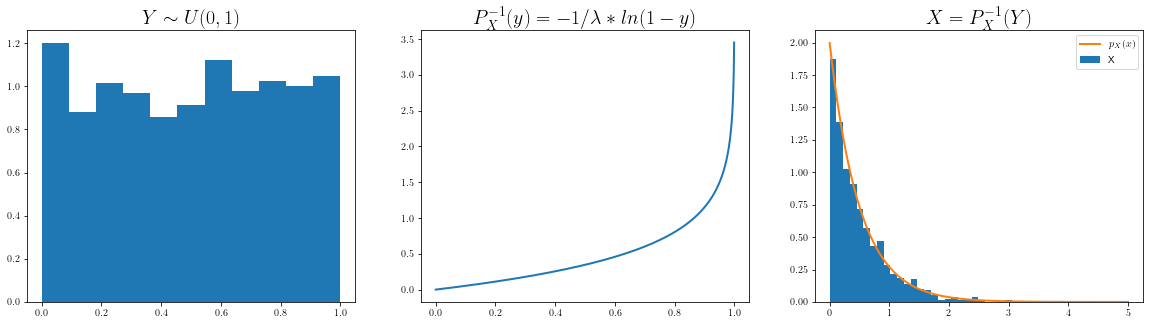

In [113]:
res=1000
x = np.linspace(0,1,res)
y_min=0.001
y_max=5
y=  np.linspace(y_min,y_max,res)
n=1000 # sample size
lamb = 2
Y = uniform.rvs(size = n) #uniform random samples
transform = -(1/lamb)*np.log(1-Y)
#pdf = stats.expon.pdf(y)
pdf2= lamb*np.exp(-lamb*y)
#Visualization

fig, axs = plt.subplots(1,3,figsize=(20, 5))
for i, ax in enumerate(axs.reshape(-1)):
    if i==0:
        ax.hist(Y, density = True, bins = 'auto', linewidth = .5)
        ax.set_title(r'$Y \sim U(0, 1)$', fontsize=20)


    elif i==1:
        ax.plot(x,-1/lamb*np.log(1-x),linewidth = 2)
        ax.set_title(r'$P_X ^{-1}(y) = -1/\lambda*ln(1 − y)$',fontsize=20)

    else:
        ax.hist(transform, density = True, bins = 'auto', linewidth = .5, label ="Histogram X")
        ax.plot(y,pdf2,linewidth = 2, label=r'$p_X(x)$')
        ax.set_title(r'$X = P_X^{−1}(Y )$',fontsize=20)
        ax.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

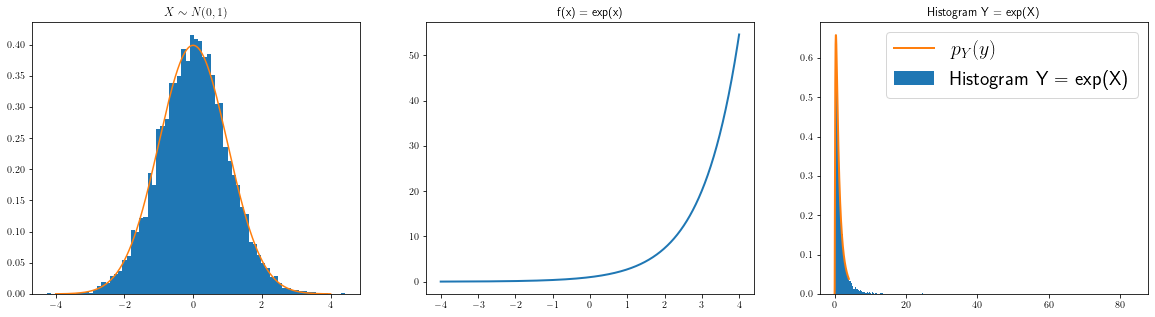

In [120]:
res=1000
x = np.linspace(-4,4,res)
y = np.linspace(0.001,4,res)
n = 10000 #sample size
r_samples = norm.rvs(size = n)
exp_zsample = np.exp(r_samples)

#Visualization
fig, axs = plt.subplots(1,3,figsize=(20, 5))
for i, ax in enumerate(axs.reshape(-1)):
    if i==0:
        ax.hist(r_samples, density = True, bins = 'auto', linewidth = .5)
        ax.plot(x,norm.pdf(x))
        ax.set_title(r'$X \sim N(0, 1)$')

    elif i==1:
        ax.plot(x,np.exp(x),linewidth = 2)
        ax.set_title("f(x) = exp(x)")
    else:
        ax.hist(exp_zsample,density = True, bins = 'auto', linewidth = 0.5,label=r'Histogram Y = exp(X)')
        ax.plot(y,(1/np.sqrt(2*np.pi)) * (1/np.abs(y)) * np.exp(-1/2*(np.log(y)**2)),linewidth =2, label=r'$p_Y(y)$')
        ax.set_title("Histogram Y = exp(X)")
        ax.legend(fontsize=20)
plt.show

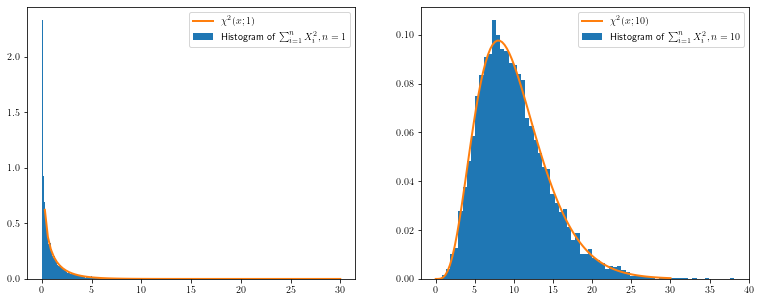

In [122]:
n = 10000 #sample size
res=100
x = np.linspace(0,30,res)
Theta = (1,10)


fig = plt.figure(figsize = (20,5))
gs = gridspec.GridSpec(1,3)
ax = {}

#df iterations
for i,theta in enumerate(Theta):
  sample = np.full((n,theta), np.nan)
  #rv iterations
  for j in range(theta):
    #sampling iterations
    for k in range(n):
      sample[k,j] = norm.rvs(0,1)**2
  
  sample = np.sum(sample,axis=1)

  ax = {}
  ax[i] = plt.subplot(gs[i])
  ax[i].hist(sample, density = True, bins = 'auto',linewidth =2, label = r'Histogram of $\sum_{{i=1}}^{{n}} X_i^2, n={}$'.format(theta))
  ax[i].plot(x,chi2.pdf(x,theta),linewidth =2, label = r'$\chi^2(x;{})$'.format(theta))
  ax[i].legend()

# (6) Expectation and covariance

1. Sample n = 10 data points of a univariate Gaussian distribution and evaluate the sample mean,
sample variance, and sample standard deviation.


In [54]:
n=10 #sample size
mu=1
sigmasqr=2
random_samples= rv.norm.rvs(mu, np.sqrt(sigmasqr),size=n)
bar_x=1/n*np.sum(random_samples) #sample mean
sample_var=(1/(n-1))*np.sum((random_samples - bar_x)**2)   #sample variance
std=np.sqrt(sample_var) #sample standard deviation
print('sample mean={0:2.2f}'.format(bar_x))
print('sample variance={0:2.2f}'.format(sample_var))
print('sample standard deviation={0:2.2f}'.format(std))

sample mean=1.51
sample variance=1.48
sample standard eviation=1.22


2. Sample n = 10 data points of a bivariate Gaussian distribution and evaluate the sample covariation
and sample correlation.


In [64]:
#Initialisation
exp = [1,2]

cov = [[0.3,0.2],
      [0.2,0.5]]

x = np.random.multivariate_normal(exp, cov, size = n) #sample bivariate gaussian
bar_xy=1/n*np.sum(x,axis=0) #sample mean
sample_var_x=(1/(n-1))*np.sum((x[:,0] - bar_xy[0])**2)   #sample variance x0
sample_var_y=(1/(n-1))*np.sum((x[:,1] - bar_xy[1])**2)   #sample variance x1
std_x=np.sqrt(sample_var_x) #sample standard deviation x0
std_y=np.sqrt(sample_var_y) #sample standard deviation x1\
c_n=(1/(n-1))*np.sum((x[:,0] - bar_xy[0])*(x[:,1] - bar_xy[1]))  #covariance
correlation=c_n/(std_x*std_y)
print('sample mean=',bar_xy)
print('sample standard deviation X ={0:2.2f}'.format(std_x))
print('sample standard deviation Y ={0:2.2f}'.format(std_y))
print('sample covariance = {0:2.4f}'.format(c_n), ' numpy covariance:',np.cov(x.T,ddof=1))
print('sample correlation = {0:2.4f}'.format(correlation), ' numpy correlation', np.corrcoef(x.T))

sample mean= [0.93532805 2.08919258]
sample standard deviation X =0.30
sample standard deviation Y =0.56
sample covariance = 0.0250  numpy covariance: [[0.0901308  0.02496382]
 [0.02496382 0.31871916]]
sample correlation = 0.1473  numpy correlation [[1.         0.14728901]
 [0.14728901 1.        ]]


3. Validate the theorem on the variances of sums and differences of random variables using a sampling
approach in a bivariate Gaussian scenario.

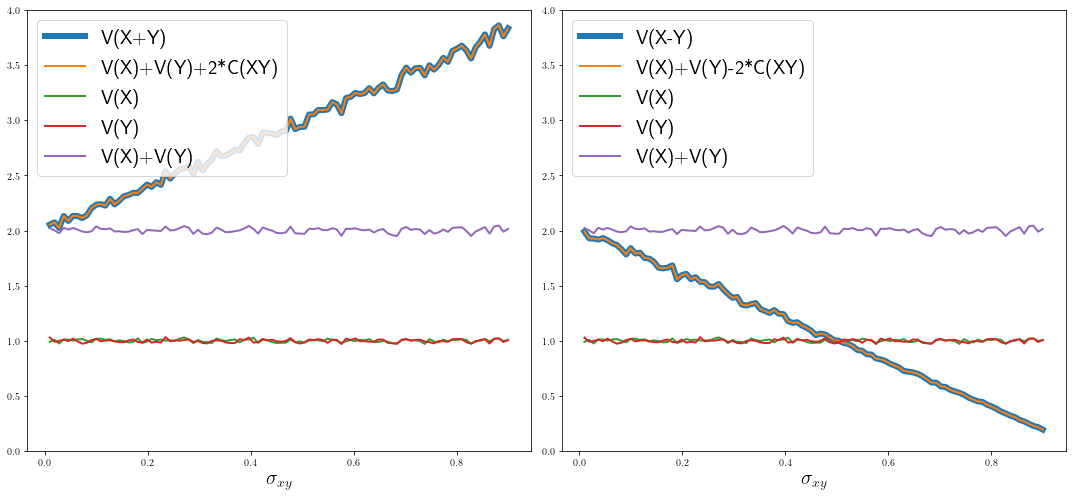

In [88]:
#Initialisation
mu = [0,0]
n=10000 #sample size
n_r=100 # xy resolution
xy=np.linspace(0.01,0.9,n_r) #xy space
V_xy=np.full((n_r,1),np.nan) #variance x+y
V_x=np.full((n_r,1),np.nan)  #variance X
V_y=np.full((n_r,1),np.nan)  #variance Y
C_xy=np.full((n_r,1),np.nan) #covariance XY
V_xy_m=np.full((n_r,1),np.nan) #variance x-y
for i, sxy in np.ndenumerate(xy):
    #covraince matrix
    sigma=np.array([[1,sxy],[sxy,1]])
    XY=rv.multivariate_normal.rvs(mu,sigma,size=n)
    X_plus_Y=XY[:,0]+XY[:,1]
    V_xy[i[0]]=np.var(X_plus_Y,ddof=1) #Variance X+Y
    V_x[i[0]]=np.var(XY[:,0],ddof=1)  #Variance X
    V_y[i[0]]=np.var(XY[:,1],ddof=1)  #variance Y
    C_xy[i[0]]=np.cov(XY.T,ddof=1)[0,1] #covraince XY
    
    X_minus_Y=XY[:,0]-XY[:,1]
    V_xy_m[i[0]]=np.var(X_minus_Y,ddof=1) #Variance X-Y
fig, axs = plt.subplots(1,2,figsize=(15, 7))
for kk, ax in enumerate(axs.reshape(-1)):
    if kk==0:
        ax.plot(xy,V_xy,linewidth=6,label=r'V(X+Y)')
        ax.plot(xy,V_x+V_y+2*C_xy,linewidth=2,label=r'V(X)+V(Y)+2*C(XY)')
        ax.plot(xy,V_x,linewidth=2,label=r'V(X)')
        ax.plot(xy,V_y,linewidth=2,label=r'V(Y)')
        ax.plot(xy,V_x+V_y,linewidth=2,label=r'V(X)+V(Y)')
        #ax.set_title('Univariate Gaussian',fontsize=20)
        ax.set_xlabel(r'$\sigma_{xy}$',fontsize=20)
        #ax.set_xlim(0,4)
        ax.set_ylim(0,4)
        ax.legend(loc='upper left',fontsize=20)
    else:
        ax.plot(xy,V_xy_m,linewidth=6,label=r'V(X-Y)')
        ax.plot(xy,V_x+V_y-2*C_xy,linewidth=2,label=r'V(X)+V(Y)-2*C(XY)')
        ax.plot(xy,V_x,linewidth=2,label=r'V(X)')
        ax.plot(xy,V_y,linewidth=2,label=r'V(Y)')
        ax.plot(xy,V_x+V_y,linewidth=2,label=r'V(X)+V(Y)')
        #ax.set_title('Univariate Gaussian',fontsize=20)
        ax.set_xlabel(r'$\sigma_{xy}$',fontsize=20)
        ax.set_ylim(0,4)
        ax.legend(loc='upper left',fontsize=20)
fig.tight_layout()
plt.show()

# (7) Inequalities and limits

1. Write simulations that validate the Markov and Chebychev inequalities.


<ipython-input-124-cdc0479915a8>:23: RuntimeWarning: divide by zero encountered in double_scalars
  exp_X_over_x[i] = theta/xx


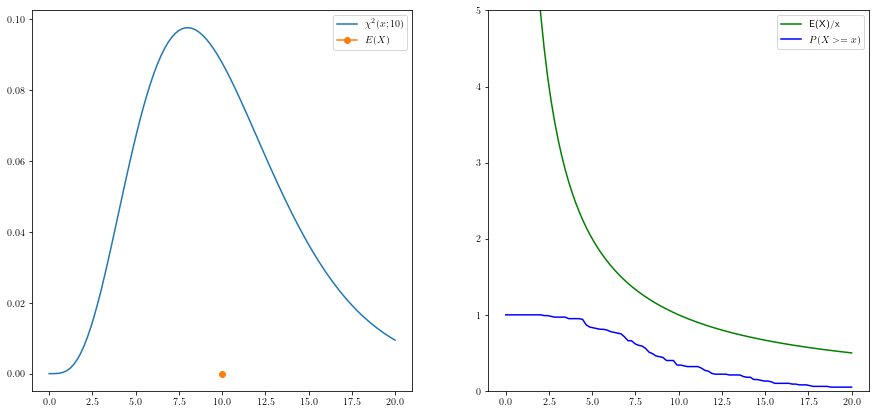

In [124]:
 #Markov inequality 
res=100    
x_space = np.linspace(0,20,res)
n = 100
Theta = (1,10)



#df iterations
for i,theta in enumerate(Theta):
  sample = np.full((n,theta), np.nan)
  
  #rv iterations
  for j in range(theta):
    #sampling iterations
    for k in range(n):
      sample[k,j] = norm.rvs(0,1)**2

X = np.sum(sample,axis=1)
exp_X_over_x = np.zeros(res)
prob = []
for i, xx in np.ndenumerate(x_space):
  exp_X_over_x[i] = theta/xx
  P = (X >= xx).sum()/100
  prob.append(P)
fig, axs = plt.subplots(1,2,figsize=(15, 7))
for kk, ax in enumerate(axs.reshape(-1)):
    if kk==0:
        ax.plot(x_space,chi2.pdf(x_space,theta), label = r'$\chi^2(x;{})$'.format(theta))

        ax.plot(theta, 0, marker = 'o', label=r'$E(X)$')
        ax.legend()
    else:
        ax.plot(x_space, exp_X_over_x , label='E(X)/x', color = 'g')
        ax.plot(x_space, prob, label = r'$P(X>=x)$', color = 'b')
        ax.set_ylim(0,5)
        ax.legend()
plt.show()

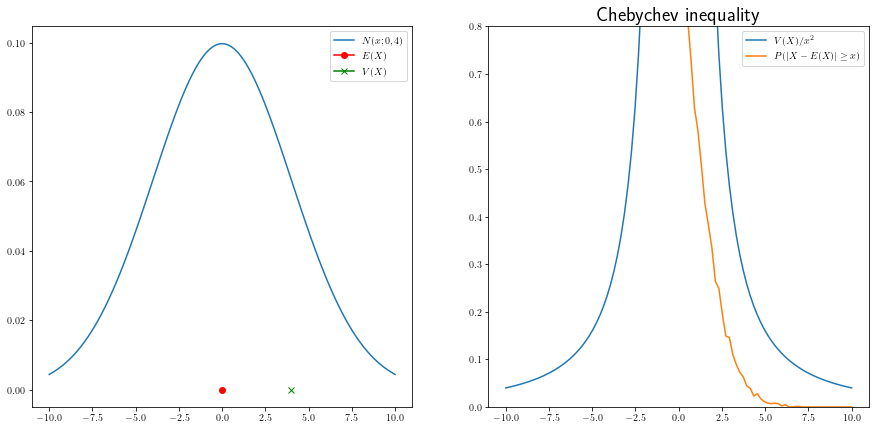

In [244]:
#Chebychev inequality
x_space = np.linspace(-10,10,100)
mu=0
sigmasqr=4
n_sim = 1000
result_p = []
X_hmm = np.full((n_sim),np.nan)
EX=0
VX=4
p = []
expresult = []
for i, x in np.ndenumerate(x_space):
  empirical_vals = np.zeros(n_sim)
  for j in range(n_sim):
      X = norm.rvs(EX,np.sqrt(VX))
      X_hmm[j] = X
  result_p = ((abs(X_hmm-EX)) >= x).sum()/n_sim
  p.append(result_p)
  res2= VX/ (x**2)
  expresult.append(res2)
  

fig, axs = plt.subplots(1,2,figsize=(15, 7))
for kk, ax in enumerate(axs.reshape(-1)):
    if kk==0:

        ax.plot(x_space, norm.pdf(x_space,0,4),label = r'$N(x;{},{})$'.format(mu,sigmasqr))
        #ax[0].hist(hmm, bins = 10, density= True)
        ax.plot(EX, 0 , marker = 'o', color ='r',label=r'$E(X)$')
        ax.plot(VX, 0 , marker = 'x', color ='g',label=r'$V(X)$')
        ax.legend()
    else:
        ax.plot(x_space, expresult , label=r'$V(X)/x^{2}$')
        ax.set_ylim(0,0.8)
        ax.plot(x_space, p, label = r'$P(|X - E(X)| \geq x)$')
        ax.set_title('Chebychev inequality',fontsize=20)
        ax.legend()
plt.show()

2. Write a simulation that validates the Weak Law of Large Numbers.


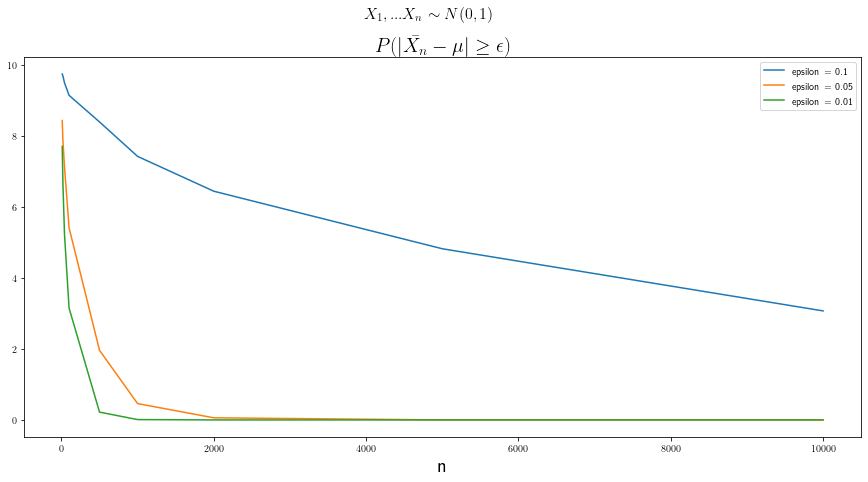

In [245]:
n_samples = [10,20,40,100,500,1000,2000,5000,10000]
mu=0
sigmasqr =1
n_sim = 1000
epsilon = [0.01,0.06,0.1]

y=np.full((3,9), np.nan)
for i, eps in np.ndenumerate(epsilon):
    #simulation iterations
    y_final= []
    for n in n_samples:
      size_res = np.full(n_sim,np.nan)
      for j in range(n_sim):
          X = norm.rvs(mu,np.sqrt(sigmasqr), size = n)
          X_bar = np.mean(X)
          size_res[j] = X_bar
      p = (abs(size_res - mu) >= eps).sum()/100
      y_final.append(p)  
    y[i] = y_final

fig = plt.figure(figsize = (15,7))
plt.plot(n_samples,y[0], label = "epsilon = 0.1")
plt.plot(n_samples,y[1], label = "epsilon = 0.05")
plt.plot(n_samples,y[2], label = "epsilon = 0.01")
plt.xlabel("n",size=20)
plt.suptitle(r"$X_1,...X_n \sim N(0,1)$",fontsize=16)
plt.title(r"$P(|\bar{X_n} - \mu| \geq \epsilon )$", fontsize=20)
plt.legend()

3. Write a simulation that validates the Lindenberg-Lévy Central Limit Theorem.


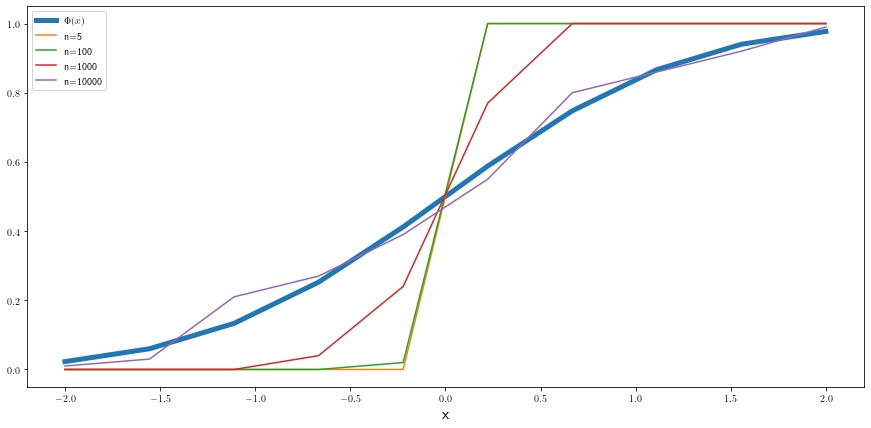

In [266]:
x_min=-2
x_max=2
res=10
x_space = np.linspace(x_min,x_max,res)
n_samples = [5,100,1000,10000]
def GSample(n):
  return gamma.rvs(1,size = n)  
results = []
for n_s in n_samples:
  same_sample_res = []
  for i, x in np.ndenumerate(x_space):
    empirical_vals = np.zeros(100)
    for j in range(100):
      mu = gamma.stats(1, moments = 'm')
      sigma = gamma.stats(1,moments = 'v')
      n = len(GSample(n_s))
      empirical_vals[j] = (np.mean(GSample(siz))- mu)/ (sigma / (n** .5)) 
    
    p= (empirical_vals <=x).sum()/100
    same_sample_res.append(p)
  results.append(same_sample_res)

plt.figure(figsize = (15,7))
plt.plot(x_space, norm.cdf(x_space,0,1), linewidth = 5,label=r'$\Phi(x)$')
plt.plot(x_space, results[0], label=r'n={}'.format(n_samples[0]))
plt.plot(x_space, results[1],label=r"n={}".format(n_samples[1]))
plt.plot(x_space, results[2],label=r"n={}".format(n_samples[2]))
plt.plot(x_space, results[3],label=r"n={}".format(n_samples[3]))
plt.legend( loc = 'upper left')
plt.xlabel('x',fontsize=16)
plt.show()

4. Write a simulation that validates the Liapunov Central Limit Theorem.

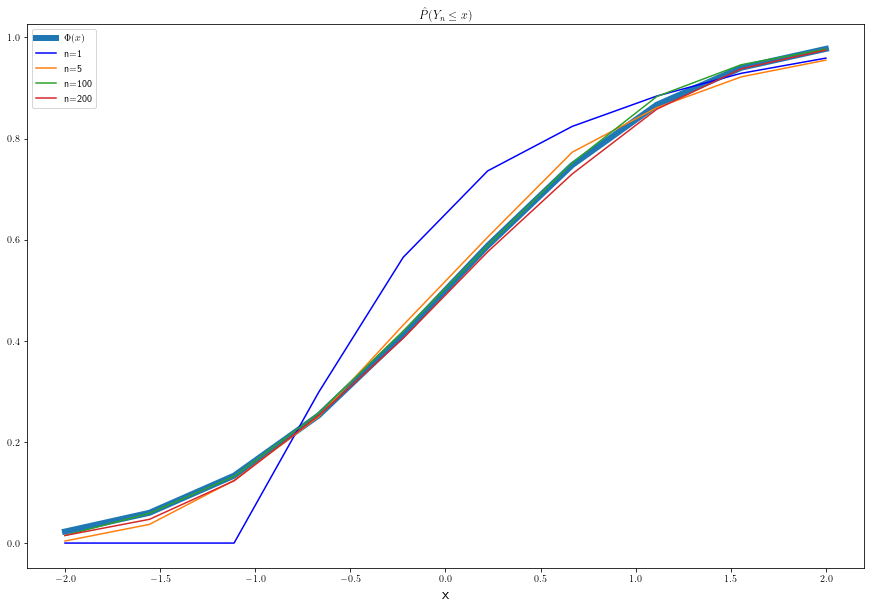

In [268]:
n_samples = [1,5,100,200]
x_min=-2
x_max=2
res=10
simulation = 1000
x_space = np.linspace(x_min,x_max,res)


L_cdf = np.full((res, len(s_sizes)),np.nan)

#sample size iterations
for idx, n_s in np.ndenumerate(n_samples):
  #simulation repeat iterations
  Y = np.full(simulation, np.nan)
  for s in range(simulation):
    X = np.full(n_s, np.nan) 
    mu = np.full(n_s, np.nan) 
    sigsqr = np.full(n_s, np.nan) 

    #random variable iterations
    for k in np.arange(n_s):

      mu[k],sigsqr[k] = rv.gamma.stats(k+1,moments ='mv')
      X[k] = rv.gamma.rvs(k+1)
    

    Y[s] = (np.sum(X) - np.sum(mu))/np.sqrt(np.sum(sigsqr))
  
  #x axis iterations
  for x_idx, x in np.ndenumerate(x_space):
    L_cdf[x_idx,idx] = np.mean(Y<=x)

#plotting

plt.figure(figsize = (15,10))

plt.plot(x_space,rv.norm.cdf(x_space,0,1), linewidth = 6,label=r'$\Phi(x)$')
plt.plot(x_space, L_cdf[:,0], color='b',label=r'n={}'.format(n_samples[0]))
plt.plot(x_space, L_cdf[:,1],label=r'n={}'.format(n_samples[1]))
plt.plot(x_space, L_cdf[:,2],label=r'n={}'.format(n_samples[2]))
plt.plot(x_space, L_cdf[:,3],label=r'n={}'.format(n_samples[3]))
plt.legend(loc = 'upper left')
plt.title(r"$\hat{P}(Y_{n} \leq x)$")
plt.xlabel('x',fontsize=16)
plt.show()

# (8) Maximum likelihood estimation

1. Let  X 1 , ..., X n ∼Bern (μ) be n = 20 i.i.d. Bernoulli random variables.
Using an optimization routine of your choice, formulate and implement the numerical maximum likelihood estimation of
μ for true, but unknown values of μ = 0.7 and μ =1 based on X 1 , ..., X n


<ipython-input-272-b6ba9cebcd75>:34: RuntimeWarning: divide by zero encountered in log
  log_lilihood[i,j] = np.log(l)*np.sum(rvs[i]) + np.log(1-l)*(len(rvs[i])-np.sum(rvs[i]))
/home/suresh/.local/lib/python3.8/site-packages/scipy/optimize/_minimize.py:533: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,
<ipython-input-272-b6ba9cebcd75>:34: RuntimeWarning: invalid value encountered in double_scalars
  log_lilihood[i,j] = np.log(l)*np.sum(rvs[i]) + np.log(1-l)*(len(rvs[i])-np.sum(rvs[i]))
<ipython-input-272-b6ba9cebcd75>:27: RuntimeWarning: invalid value encountered in log
  ln_mu = - np.log(mu)*np.sum(x) - np.log(1-mu)*(n-np.sum(x))


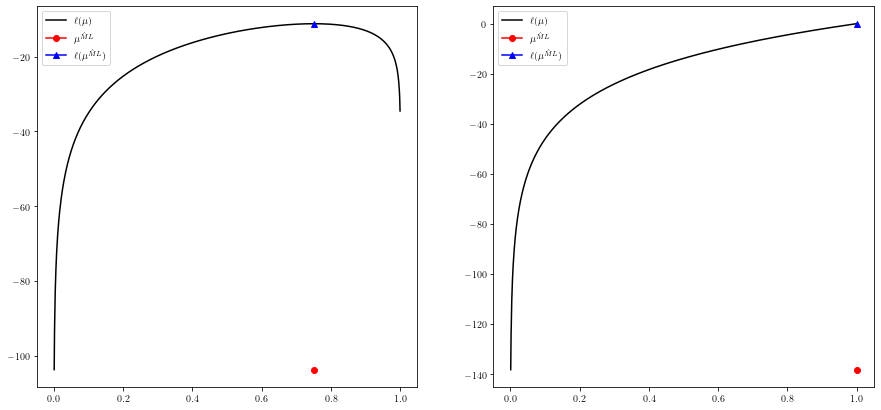

In [272]:
#Initialisation
n = 20
c_mu = [0.7,1.0]
numerical_mle = np.zeros((len(c_mu))) #store num MLE
rvs = np.zeros((len(c_mu),n))


res=1000
x_space = np.linspace(0,1,res)


log_lilihood = np.zeros((len(c_mu), len(x_space))) 


def mle(X):
  res = minimize(negbern_ln,
                 args = X,
                 x0 = 0.5,
                 bounds = [1e-3,1-1e-3],
                 method = 'Nelder-Mead')
  mu_hat = res.x
  return mu_hat
   
def negbern_ln(mu,x):
  mu = mu
  n = len(x)
  ln_mu = - np.log(mu)*np.sum(x) - np.log(1-mu)*(n-np.sum(x))
  return  ln_mu
#Store realisations of n i.i.d Bern RV
for i,mu in enumerate(c_mu):
  rvs[i] = rv.bernoulli.rvs(mu, size=n)
for i, mu in np.ndenumerate(c_mu):
    for j, l in np.ndenumerate(nspace):
      log_lilihood[i,j] = np.log(l)*np.sum(rvs[i]) + np.log(1-l)*(len(rvs[i])-np.sum(rvs[i]))
    numerical_mle[i] = mle(rvs[i]) 
    
fig, axs = plt.subplots(1,2,figsize=(15, 7))
for kk, ax in enumerate(axs.reshape(-1)):
    if kk==0:  
        
        ax.plot(x_space,
                   log_lilihood[0],
                   label =r'$\ell(\mu)$',
                   color = [0,0,0])
        ax.plot(numerical_mle[0],
                  min(log_lilihood[0,1:999]),
                  marker = 'o',
                  color = 'r',
                  mfc = 'r',
                  label =r'$\hat{\mu^{ML}}$')
        ax.plot(numerical_mle[0],
                  max(log_lilihood[0]),
                  marker = '^',
                  color = 'b',
                  mfc = 'b',
                  label =r'$\ell(\hat{\mu^{ML}})$')
        ax.legend()
    else:
        ax.plot(nspace,
               log_lilihood[1],
               label =r'$\ell(\mu)$',
               color = [0,0,0])
        ax.plot(numerical_mle[1],
               min(log_lilihood[1,1:999]),
              marker = 'o',
              color = 'r',
              mfc = 'r',
             label =r'$\hat{\mu^{ML}}$')
        ax.plot(numerical_mle[1],
               max(log_lilihood[1]),
              marker = '^',
              color = 'b',
              mfc = 'b',
              label =r'$\ell(\hat{\mu^{ML}})$')
        ax.legend()
plt.show()

2. Let X 1 , ..., X n ∼ Bern (μ). For a large number n, sample the X 1 , ..., X n and evaluate the maximum likelihood estimator. Repeat m times and create a histogram of the realized μ̂ ML. 

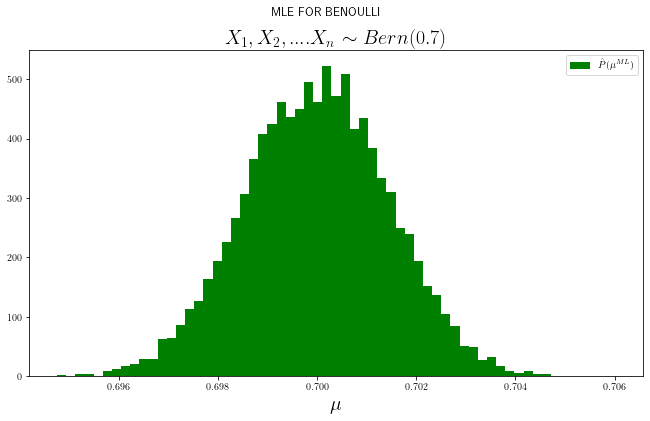

In [179]:
mu = 0.7
n= 100000 #samples
sim = 10000 #no. of tries

Max_likelihood = np.zeros(sim)

#Iteration
for i in range(sim):
  s = rv.bernoulli.rvs(mu,size=n)
  smean = 1/n * np.sum(s)
  Max_likelihood[i] = smean 

fig, ax = plt.subplots(1, figsize=(11,6))


ax.hist(Max_likelihood,bins='auto',color='g', label=r'$\hat{P}(\mu^{ML})$')
ax.set_title(r'$X_1,X_2,....X_n \sim Bern(0.7)$',fontsize=20)
fig.suptitle("MLE FOR BENOULLI")
ax.set_xlabel(r'$\mu$', fontsize=20)
ax.legend()

# (9) Finite estimator properties

1. For X 1 , ..., X n ∼ Bern (μ) implement a simulation which validates the unbiasedness of the sample mean, the unbiasedness of the sample variance, the biasedness of the sample standard deviation, and the biasedness of the maximum likelihood variance parameter estimator.

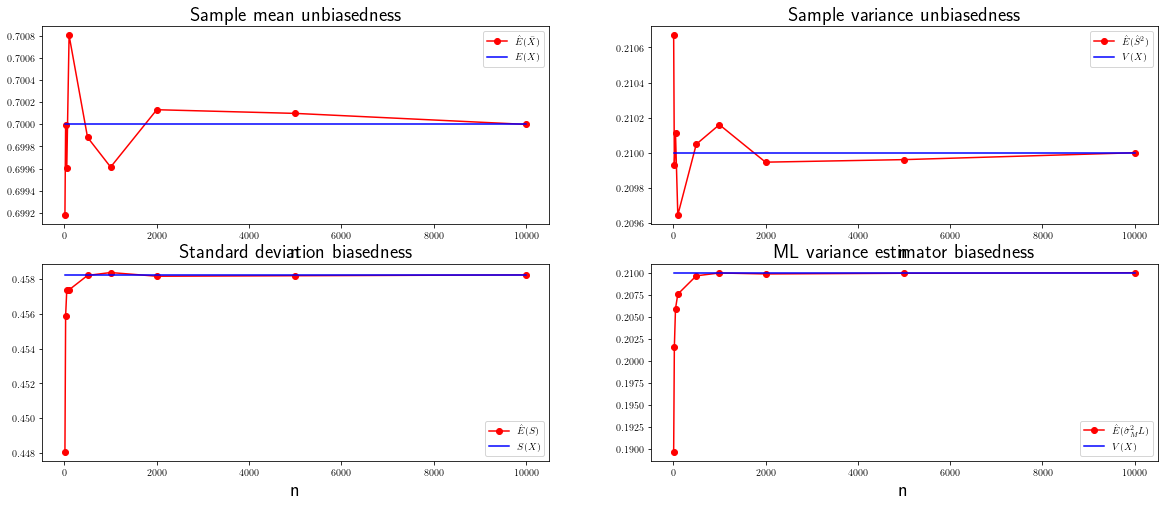

In [193]:
mu=0.7
n=100000 #sample size
n_sim = 10000
s = range(n_sim)
V_X = 0.21
S_X = 0.458247
samples = [10,25,50,100,500,1000,2000,5000,10000]

#simulation iterations
E_hat = []
V_hat = []
S_hat =[]
V_hat_b = []
for n_s in samples:
    s_res = []
    v_res =[]
    st_res=[]
    vb_res =[]
    for i in range(n_sim):
        X = rv.bernoulli.rvs(mu, size = n_s)
        s_res.append(np.mean(X)) #unbiased mean
        v_res.append(np.var(X, ddof = 1))  #unbaised variance
        st_res.append(np.std(X, ddof = 1)) #biased std
        vb_res.append(np.var(X, ddof = 0))  #baised variance
    E_hat.append(np.sum(np.array(s_res))/n_sim)
    V_hat.append(np.sum(np.array(v_res))/n_sim)
    S_hat.append(np.sum(np.array(st_res))/n_sim)
    V_hat_b.append(np.sum(np.array(vb_res))/n_sim)
fig, axs = plt.subplots(2,2,figsize=(20,8))
for kk, ax in enumerate(axs.reshape(-1)):
    if kk==0:

        ax.plot (samples,
                E_hat,
                color = 'r',
                label = r'$\hat{E}(\bar{X})$',
                marker ='o')
        ax.plot (samples,
                mu*np.ones(9),
                color = 'b', label = r"$E(X)$")
        ax.legend()
        ax.set_xlabel('n',fontsize=20)
        ax.set_title('Sample mean unbiasedness', fontsize=20)
    elif kk==1:
        ax.plot (samples,
            V_hat,
            color = 'r',
            label = r"$\hat{E}(\hat{S}^{2})$",
            marker ='o')
        ax.plot (samples,
                    V_X*np.ones(9),
                    color = 'b', label = r"$V(X)$")
        ax.legend()
        ax.set_xlabel('n',fontsize=20)
        ax.set_title('Sample variance unbiasedness', fontsize=20)
    elif kk==2:
        ax.plot (samples,
            S_hat,
            color = 'r',
            label = r"$\hat{E}(S)$",marker ='o')
        ax.plot (samples,
                    S_X*np.ones(9),
                    color = 'b', label = r"$S(X)$")
        ax.legend()
        ax.set_xlabel('n',fontsize=20)
        ax.set_title('Standard deviation biasedness', fontsize=20)
    else:
        ax.plot (samples,
            V_hat_b,
            color = 'r',
            marker ='o',
            label = r"$\hat{E}(\hat{\sigma}^{2}_ML)$")
        ax.plot (samples,
                    V_X*np.ones(9),
                    color = 'b', label = r"$V(X)$")
        ax.legend()
        ax.set_xlabel('n',fontsize=20)
        ax.set_title('ML variance estimator biasedness', fontsize=20)
plt.show()

2. For X1, ..., Xn ∼ N(µ, σ2 ) implement a simulation which validates the unbiasedness of the sample mean, the unbiasedness of the sample variance, the biasedness of the sample standard deviation, and the biasedness of the maximum likelihood variance parameter estimator.

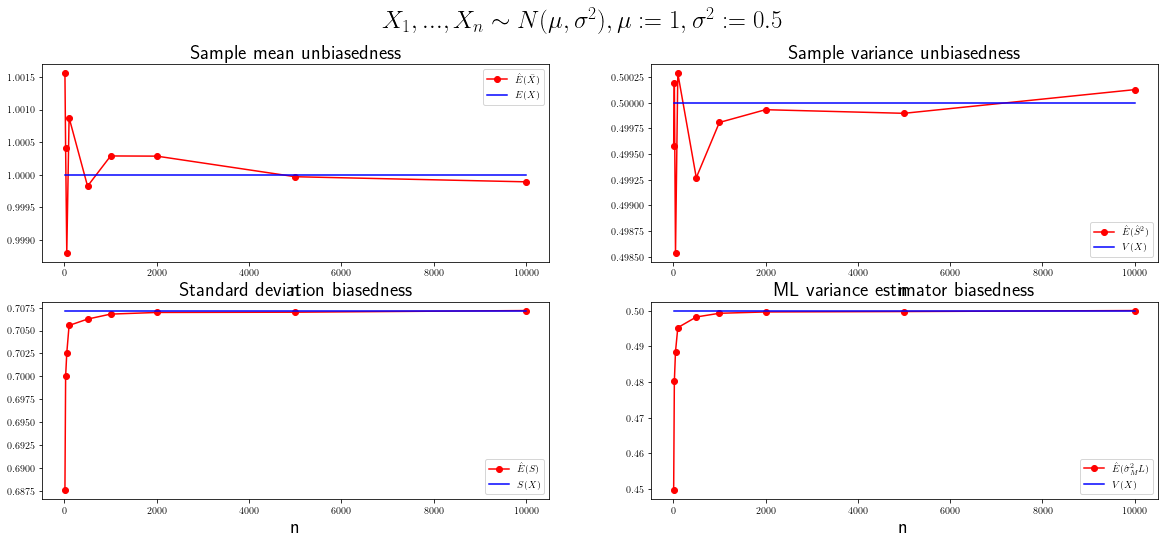

In [197]:
mu=1
Sigmasqr=0.5
n=100000 #sample size
n_sim = 10000
s = range(n_sim)
V_X = 0.21
S_X = 0.7071
samples = [10,25,50,100,500,1000,2000,5000,10000]

#simulation iterations
E_hat = []
V_hat = []
S_hat =[]
V_hat_b = []
for n_s in samples:
    s_res = []
    v_res =[]
    st_res=[]
    vb_res =[]
    for i in range(n_sim):
        X = rv.norm.rvs(mu,np.sqrt(Sigmasqr), size = n_s)
        #X = rv.bernoulli.rvs(mu, size = n_s)
        s_res.append(np.mean(X)) #unbiased mean
        v_res.append(np.var(X, ddof = 1))  #unbaised variance
        st_res.append(np.std(X, ddof = 1)) #biased std
        vb_res.append(np.var(X, ddof = 0))  #baised variance
    E_hat.append(np.sum(np.array(s_res))/n_sim)
    V_hat.append(np.sum(np.array(v_res))/n_sim)
    S_hat.append(np.sum(np.array(st_res))/n_sim)
    V_hat_b.append(np.sum(np.array(vb_res))/n_sim)
fig, axs = plt.subplots(2,2,figsize=(20,8))
for kk, ax in enumerate(axs.reshape(-1)):
    if kk==0:

        ax.plot (samples,
                E_hat,
                color = 'r',
                label = r'$\hat{E}(\bar{X})$',
                marker ='o')
        ax.plot (samples,
                mu*np.ones(9),
                color = 'b', label = r"$E(X)$")
        ax.legend()
        ax.set_xlabel('n',fontsize=20)
        ax.set_title('Sample mean unbiasedness', fontsize=20)
    elif kk==1:
        ax.plot (samples,
            V_hat,
            color = 'r',
            label = r"$\hat{E}(\hat{S}^{2})$",
            marker ='o')
        ax.plot (samples,
                    Sigmasqr*np.ones(9),
                    color = 'b', label = r"$V(X)$")
        ax.legend()
        ax.set_xlabel('n',fontsize=20)
        ax.set_title('Sample variance unbiasedness', fontsize=20)
    elif kk==2:
        ax.plot (samples,
            S_hat,
            color = 'r',
            label = r"$\hat{E}(S)$",marker ='o')
        ax.plot (samples,
                    S_X*np.ones(9),
                    color = 'b', label = r"$S(X)$")
        ax.legend()
        ax.set_xlabel('n',fontsize=20)
        ax.set_title('Standard deviation biasedness', fontsize=20)
    else:
        ax.plot (samples,
            V_hat_b,
            color = 'r',
            marker ='o',
            label = r"$\hat{E}(\hat{\sigma}^{2}_ML)$")
        ax.plot (samples,
                    Sigmasqr*np.ones(9),
                    color = 'b', label = r"$V(X)$")
        ax.legend()
        ax.set_xlabel('n',fontsize=20)
        ax.set_title('ML variance estimator biasedness', fontsize=20)
plt.suptitle(r'$X_1 , ..., X_n \sim N(\mu, \sigma ^{2} ), \mu := 1, \sigma ^{2} := 0.5$',fontsize=25)
plt.show()

3. Let X 1 , ..., X n ∼ N (μ, σ^2 ) implement a simulation that validates the bias-variance decompositions of the mean squared errors of the maximum likelihood estimator of σ^2 , the sample variance S^2 , and the estimator σ̂ 2 introduced in the theoretical exercise (DeGroot and Schervish, 2012, Example 8.7.6).

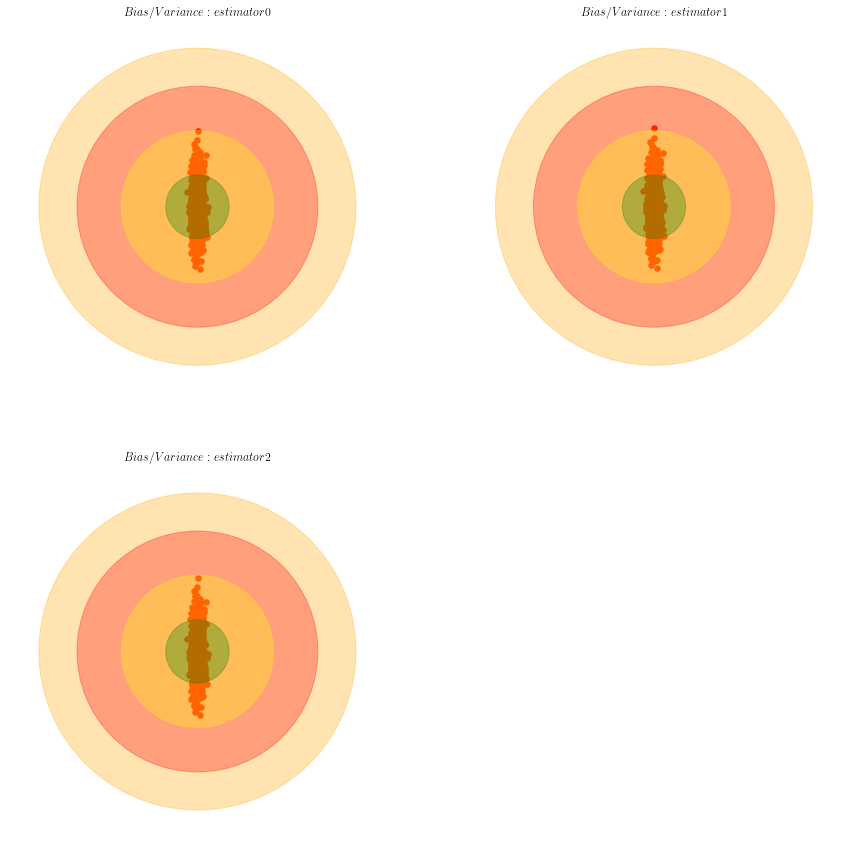

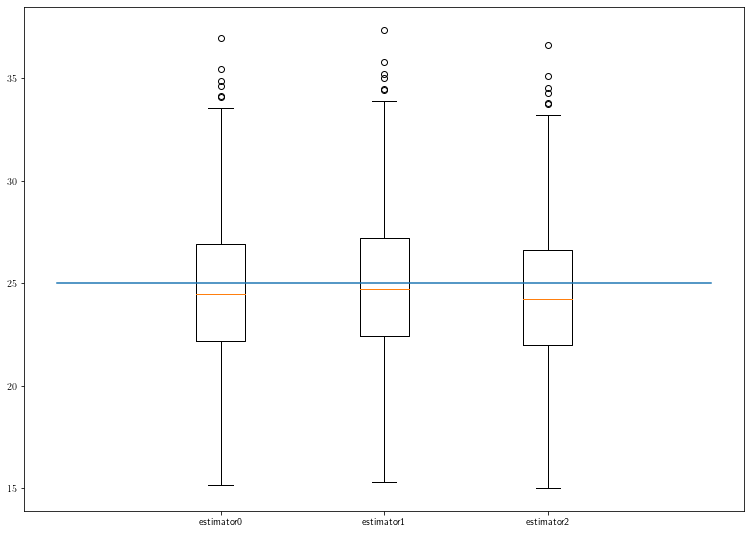

validation of estimators for the bias-variance decompositions of mean squared errors through simulation with number of samples: 100
         MSE    Bias^2   Variance  MSE=Bias^2+Variance
0  12.004170  0.112310  11.891859            12.004170
1  12.140706  0.007394  12.133312            12.140706
2  11.993171  0.335628  11.657542            11.993171


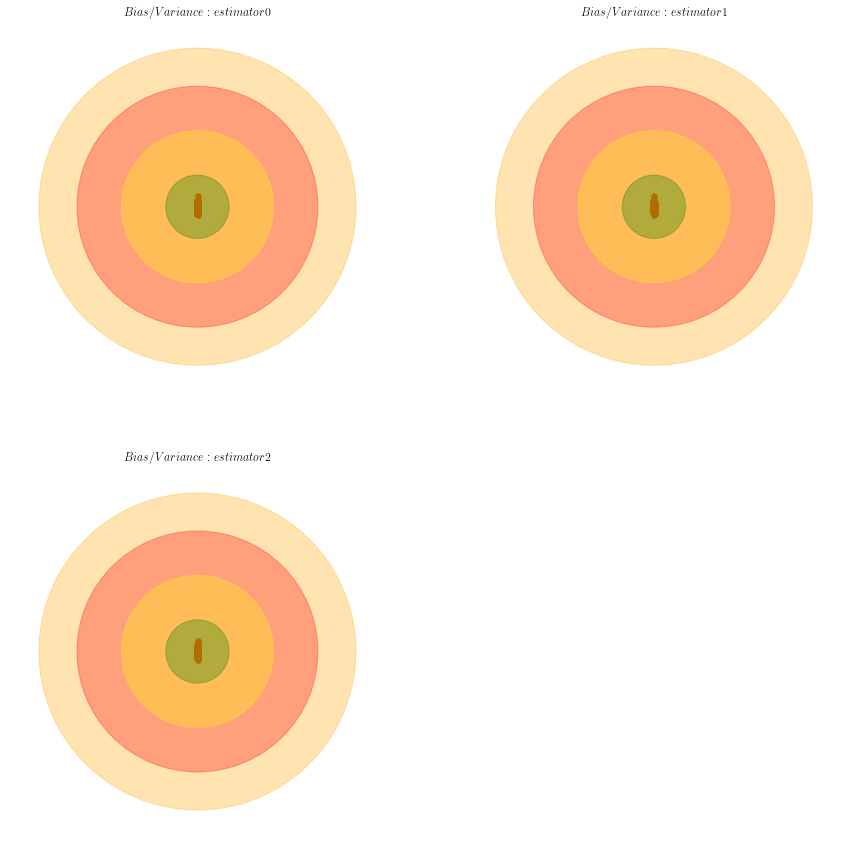

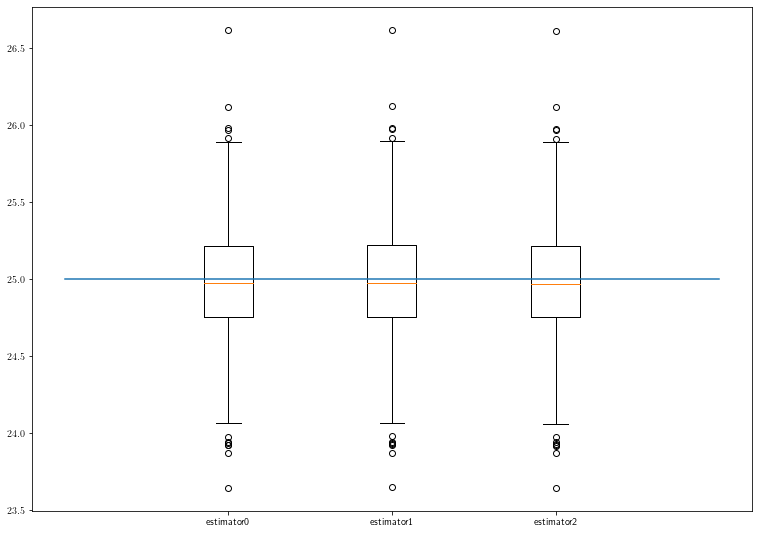

validation of estimators for the bias-variance decompositions of mean squared errors through simulatio with number of samples: 10000
        MSE    Bias^2  Variance  MSE=Bias^2+Variance
0  0.132148  0.000147  0.132002             0.132148
1  0.132120  0.000092  0.132028             0.132120
2  0.132189  0.000214  0.131975             0.132189


In [24]:
#function to draw N random samples from gaussian distribution
def draw_random_sample_from_gaussian_distribution(mu, sigma, no_samples):
    dist = norm(mu, sigma)
    # Draw  N samples from the random variable.
    sample = dist.rvs(size=no_samples)
    return sample
#function to get mean squared error based on estimate and truth value
def get_mse (estimate, truth):
    return np.mean((estimate - truth)**2, dtype=np.float64)
#function to get bias
def get_bias (estimate, truth):
    return np.mean(estimate) - truth
#function to get variance
def get_variance(estimate):
    return np.mean((estimate-np.mean(estimate))**2, dtype=np.float64)
#function to show our estimates through bullseye diagram
def bulls_eye(mu_ML_list,sigma,n_sims,data):
    # bias/variance: low-low, low-high, high-low, high-high
    a, b, c, d= 5, 12, 19,25 #circle diameter
    e = d*1.2      #axis values
    titles = ['estimator0','estimator1','estimator2'] #title
    fig, axs = plt.subplots(2,2,figsize=(15, 15))
    for kk, (ax,yy) in enumerate(zip(axs.reshape(-1),data)):
        if(kk<3):
            xx=np.array(mu_ML_list)-np.average(np.array(mu_ML_list))
            yy=np.array(yy)-sigma**2
            circle1 = plt.Circle((0, 0), a, color='green', alpha=0.3)
            circle2 = plt.Circle((0, 0), b, color='yellow', alpha=0.3)
            circle3 = plt.Circle((0, 0), c, color='red', alpha=0.3)
            circle4 = plt.Circle((0, 0), d, color='orange', alpha=0.3)
            ax.add_artist(circle4)
            ax.add_artist(circle3)
            ax.add_artist(circle2)
            ax.add_artist(circle1)
            ax.scatter(xx, yy, c='r', s=30)
            ax.set_title(r'$Bias/Variance:{}$ '.format(titles[kk]))
            ax.get_xaxis().set_ticks([])
            ax.get_yaxis().set_ticks([])
            ax.axis('off')
            ax.axis('equal')
            ax.axis([-e, e, -e, e])
    fig.delaxes(axs[1][1])
    plt.show()
#function for simulation and to calculate bias variance values
def bias_variance_decomposition(no_samples=100):
    # Define parameters for normal distribution.
    mu = 1
    sigma = 5
    #no_samples=100  #number of samples to be drawn
    n_sims = 1000     #number of simulation
    estimator_0=[]    
    estimator_1=[]
    estimator_2=[]
    mu_ML_list=[]
    for i in range(n_sims):
        r_samples = draw_random_sample_from_gaussian_distribution(mu, sigma,no_samples) #random N samples from Gaussian Distribution
        mu_ML=np.sum(r_samples)/no_samples   #mean of maximum likelihood 
        mu_ML_list.append(mu_ML)
        sigma_sqr_ML=1/no_samples*np.sum((r_samples-mu_ML)**2) #Maximum likelihood esimator of Sigma^2
        sample_variance=np.sum((r_samples-mu_ML)**2)*1/(no_samples-1) #sample variance 
        estimator_sigma_sqr_hat=np.sum((r_samples-mu_ML)**2)*1/(no_samples+1) #Estimator Sigma^2 hat
        estimator_0.append(sigma_sqr_ML)
        estimator_1.append(sample_variance)
        estimator_2.append(estimator_sigma_sqr_hat)
    truth=sigma**2
    df = pd.DataFrame(columns=['MSE','Bias^2','Variance','MSE=Bias^2+Variance']) #pandas dataframe creation
    # estimates
    data =[estimator_0,estimator_1,estimator_2]
    for i,estimated_values in enumerate(data):
        estimate=np.array(estimated_values)
        mse=get_mse (estimate, truth)  #mean squared error
        bias=get_bias (estimate, truth) #bias
        variance=get_variance(estimate) #variance
        df.loc[i]=[mse,bias**2,variance,bias**2+variance] #dataframe insertion
        
    bulls_eye(mu_ML_list,sigma,n_sims,data)  #bulls eye diagram to visualize the bias-variance
    
    
    return df,data,sigma
def box_plot_visualization(data,sigma):
    #box plot visualization of our estimates to see how much it deviates from actual truth
    fig = plt.figure(figsize =(10, 7)) 
    # Creating axes instance 
    ax = fig.add_axes([0, 0, 1, 1]) 
    # Creating plot 
    bp = ax.boxplot(data,labels = ['estimator0','estimator1','estimator2']) 
    ax.plot([sigma**2]*5)
    # show plot 
    plt.show()
no_samples=100
df,data,sigma=bias_variance_decomposition(no_samples)
box_plot_visualization(data,sigma)
print('validation of estimators for the bias-variance decompositions of mean squared errors through simulation with number of samples:',no_samples)
print(df)
no_samples=10000
df,data,sigma=bias_variance_decomposition(no_samples)
box_plot_visualization(data,sigma)
print('validation of estimators for the bias-variance decompositions of mean squared errors through simulatio with number of samples:',no_samples)
print(df)

# (10) Asymptotic estimator properties

1. Write a simulation that verifies the asymptotic unbiasedness of the maximum likelihood estimator for the variance parameter of a univariate Gaussian distribution. Include a verification of the unbiasedness of the sample variance.

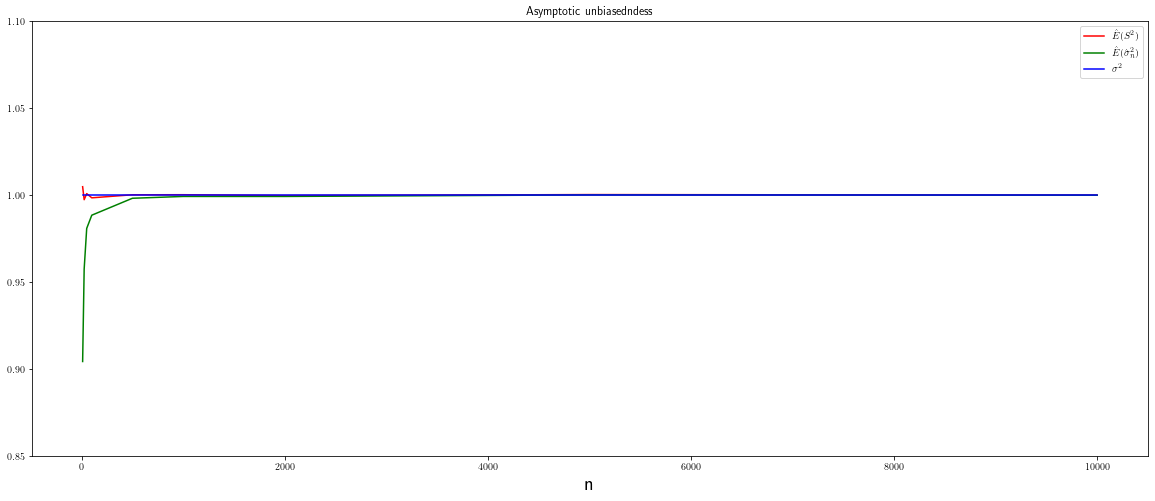

In [206]:
mu=0
Sigmasqr=1
n=100000 #sample size
n_sim = 10000
s = range(n_sim)
V_X = 0.21
S_X = 0.7071
samples = [10,25,50,100,500,1000,2000,5000,10000]

#simulation iterations
V_hat = []
V_hat_b = []
for n_s in samples:
    
    v_res =[]
    
    vb_res =[]
    for i in range(n_sim):
        X = rv.norm.rvs(mu,np.sqrt(Sigmasqr), size = n_s)
        v_res.append(np.var(X, ddof = 1))  
        vb_res.append(np.var(X, ddof = 0))  
    
    V_hat.append(np.sum(np.array(v_res))/n_sim)
    V_hat_b.append(np.sum(np.array(vb_res))/n_sim)
fig, ax = plt.subplots(1,figsize=(20,8))
ax.plot (samples,
            V_hat,
            color = 'r',label = r"$\hat{E}( S ^{2})$")
ax.plot (samples,
            V_hat_b,
            color = 'g',label = r"$\hat{E}(\hat{\sigma}^{2}_{n})$")
ax.plot (samples,
            1*np.ones(9),
            color = 'b',label=r'$\sigma ^{2}$')
ax.set_ylim(0.85,1.10)
ax.set_xlabel('n',fontsize=20)
ax.legend()
ax.set_title('Asymptotic unbiasedndess')
plt.show()

2. Write a simulation that verifies the asymptotic efficiency of the maximum likelihood estimator for the parameter of a Bernoulli distribution.

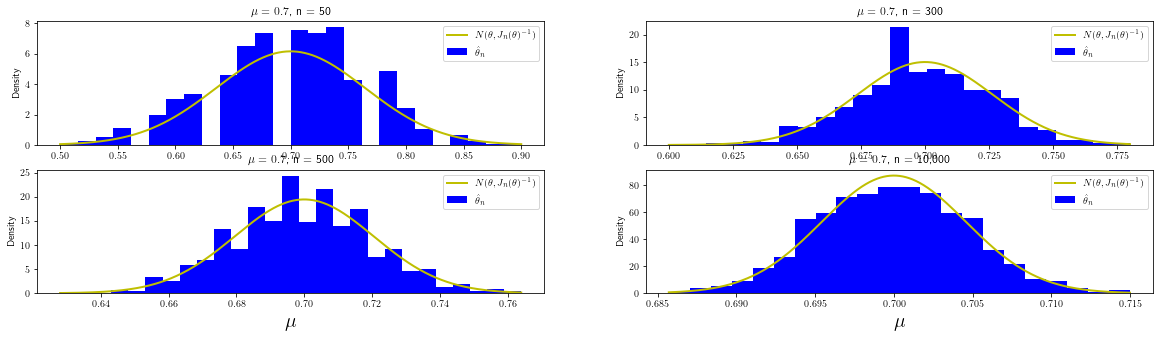

In [223]:
# Initializations

sample_sizes = [50,300,500,10000]
p = 0.7
repeats = 1000
#Setup the Plot

count_sample_sizes = len(sample_sizes)

fig, axs = plt.subplots(2,2,figsize=(20, 5))

#Estimate the Bern parameter and plot PDF of normal dist and the p-estimations
for i, ax in enumerate(axs.reshape(-1)):
  n = sample_sizes[i]
  estimators = np.full(repeats, np.nan)

  for j in range(repeats):
    bernoulli_sample = bernoulli.rvs(p, size=n)
    estimator = np.mean(bernoulli_sample)
    estimators[j] = estimator

  #define linear space

  x_min = min(estimators)
  x_max = max(estimators)
  x_res = 1000
  x_space = np.linspace(x_min,x_max,x_res)

  EFI = n/p + n/(1-p) # Expected Fisher info
  EFI_power_minus1 = EFI**(-1)

  #define plot labels
  label_norm = r'$N(\theta, J_{n}( \theta )^{-1})$'
  label_estimators = r'$\hat{ \theta }_n$'
  title_string = r'$\mu = {:,} $, n = '.format(p)+ '{:,}'.format(n)

  

  ax.plot(x_space, 
                     norm.pdf(x_space,p,math.sqrt(EFI_power_minus1)),
                     linewidth = 2,
                     color = 'y', 
                     label = label_norm);
  ax.hist(estimators, 
                    density=True,
                    bins='auto',
                    color = 'blue', 
                    label=label_estimators)
  ax.set_title(title_string)
  ax.set_xlabel(r'$\mu$',fontsize=20)
  ax.set_ylabel('Density')
  ax.legend()
plt.show()

3. Write a simulation that verifies the asymptotic efficiency of the maximum likelihood estimator for the variance parameter of a univariate Gaussian distribution.

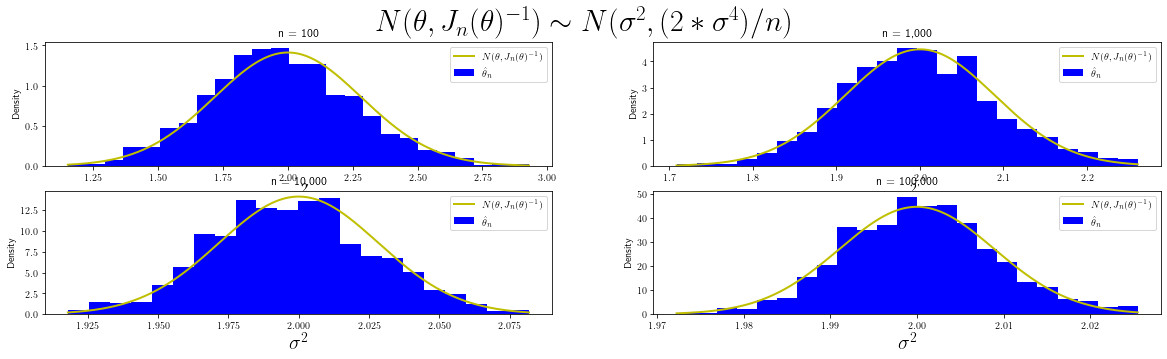

In [235]:
# Initializations

sample_sizes = [100,1000,10000,100000]
repeats = 1000
#Setup the Plot

count_sample_sizes = len(sample_sizes)

mu = 0.7
Sigmasqr  = 2
#Estimate the S_sqr parameter and plot PDF of normal dist 

fig, axs = plt.subplots(2,2,figsize=(20, 5))

#Estimate the Bern parameter and plot PDF of normal dist and the p-estimations
for i, ax in enumerate(axs.reshape(-1)):
  n = sample_sizes[i]
  estimators = np.full(repeats, np.nan)

  for j in range(repeats):
    gaussian_sample = norm.rvs(mu,np.sqrt(Sigmasqr),size=n)
    estimator = np.var(gaussian_sample, ddof = 0)
    estimators[j] = estimator

  #define linear space

  x_min = min(estimators)
  x_max = max(estimators)
  x_res = 1000
  x_space = np.linspace(x_min,x_max,x_res)

  EFI = (2*Sigmasqr**2)/n # Expected Fisher info

 #define plot labels
  label_norm = r'$N(\theta, J_{n}( \theta )^{-1})$'
  label_estimators = r'$\hat{ \theta }_n$'
  title_string = ' n = '+ '{:,}'.format(n)

  

  ax.plot(x_space, 
                     norm.pdf(x_space,Sigmasqr,math.sqrt(EFI)),
                     linewidth = 2,
                     color = 'y', 
                     label = label_norm);
  ax.hist(estimators, 
                    density=True,
                    bins='auto',
                    color = 'blue', 
                    label=label_estimators)
  ax.set_title(title_string)
  ax.set_xlabel(r'$\sigma ^{2}$',fontsize=20)
  ax.set_ylabel('Density')
  ax.legend()
plt.suptitle(r'$N(\theta, J_{n} (\theta)^{-1}) \sim N( \sigma ^{2}, (2*\sigma ^{4})/n)$', fontsize=30)
plt.show()

# (11) Confidence intervals

1.Write a simulation that veries that the T statistic is distributed according to a t-distribution with
n − 1 degrees of freedom.

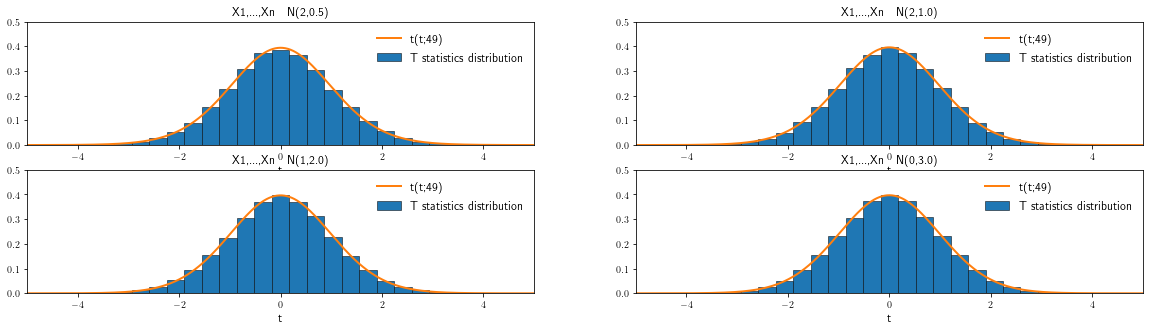

In [279]:
#Initialisation
n_sim = 100000
t_min = -5
t_max = 5
t_res = 1000
t = np.linspace(t_min,t_max,t_res)
mu = np.array ([2,2,1,0])
Sigmasqr = np.array ([0.5,1,2,3])
n_s = np.array ([20,30,40,50])
fig, axs = plt.subplots(2,2,figsize=(20, 5))

#Estimate the Bern parameter and plot PDF of normal dist and the p-estimations
for i, ax in enumerate(axs.reshape(-1)):
  ts = np.full([n_sim, 1], np.nan)
  for j in range(n_sim):
      r_sample= norm.rvs(mu[i], np.sqrt(Sigmasqr[i]), size = n_s[i])
      ts[j] = np.sqrt(n_s[i])*(np.mean(r_sample) - mu[i]) / np.sqrt(np.var(r_sample, ddof = 1))
  ax.hist(ts,density=True,
                bins = np.linspace(t_min,t_max,30),
                edgecolor = 'black', linewidth = .5,
               label = r'T statistics distribution')
  ax.plot(t,
                rv.t.pdf(t,n_s[i]-1),
                linewidth = 2,
                label = r't(t;{})'.format(n-1))
  ax.set_title(r'X1,...,Xn ~ N({},{})'.format(mu[i],Sigmasqr[i]), fontsize = 12)  
  ax.set_xlabel(r't', fontsize = 12)
  ax.set_xlim(t_min,t_max)
  ax.set_ylim(0,.5)
  ax.legend(loc = 'upper right', fontsize = 12, frameon = False)
plt.show() 

2. Write a simulation that veries that the 95%-condence interval for the expectation parameter
of a Gaussian distribution with unknown variance comprises the true, but unknown, expectation
parameter in ≈ 95% of its realizations.

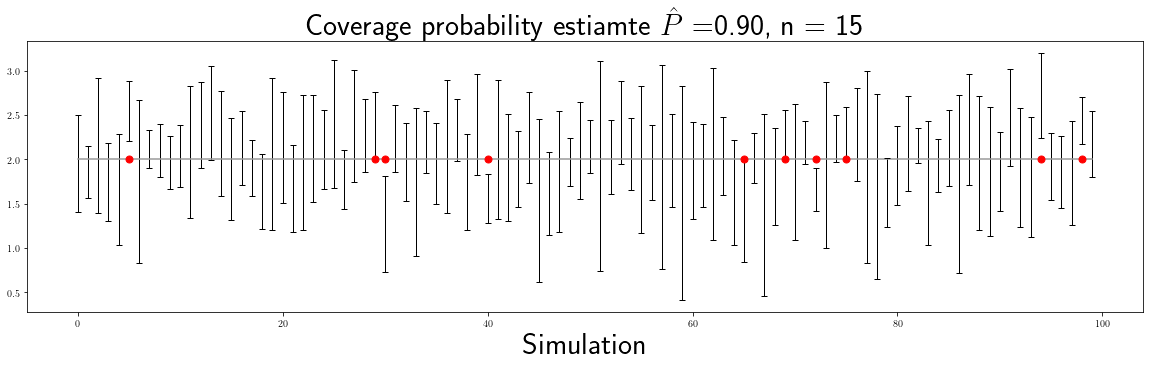

In [294]:
n = 15 #sample size
delta = 0.95 # Confidence level
mu = 2 # true but unknown exp parameter
sigmasqr = 1 # true but unknown var parameter
t_2 = rv.t.ppf((1+delta)/2,n-1) #from the formula psi^(-1)[(1+delta)/2 with n-1 degrees of freedom
n_sim = 100 # no. of simulations
S = np.full([n_sim,1], np.nan) #sample std dev
gamma = np.full([n_sim,1], np.nan) 
X_bar = np.full([n_sim,1], np.nan) #sample mean
C = np.full([n_sim,2], np.nan) #CI upper n lower boundaries
mu_in_c = np.full([n_sim,1], np.nan) #Confidence condition

#simulation
for i in range(n_sim):  
  X = rv.norm.rvs(mu,np.sqrt(sigmasqr), size = n)
  X_bar[i] = np.mean(X)
  S[i] = np.var(X,ddof = 1)
  gamma[i] = t_2*(S[i]/np.sqrt(n))
  C[i,0] = X_bar[i] - gamma[i]
  C[i,1] = X_bar[i] + gamma[i]

  if mu >= C[i,0] and mu <= C[i,1]:
    mu_in_c[i] = 1
  else:
    mu_in_c[i] = 0

mu_nin_c = np.argwhere(mu_in_c == False)
arr=gamma
newarr = arr.reshape(-1)
#visualizaion
fig, ax = plt.subplots(1,figsize=(20, 5))


ax.plot(range(n_sim),
           mu*np.ones([n_sim,1]),
           color = [.6,.6,.6])
ax.errorbar(range(n_sim),
               X_bar,
               xerr = None,
               yerr = newarr,
               linestyle ='',
               linewidth = 1,
               capsize = 3,
               color = [0,0,0])
ax.plot( mu_nin_c[:,0],
           2*np.ones([len(mu_nin_c),1]),
           ls = '',
           marker ='o',
           ms = 7,
           mfc = 'r',
           mec = 'r')
ax.set_xlabel('Simulation', fontsize = 30)
ax.set_title('Coverage probability estiamte $\hat{{P}} = ${0:1.2f}, n = {1:1.0f}'.format(np.mean(mu_in_c),n), fontsize = 30)
plt.show()

3. Write a simulation that veries that the approximate 95%-condence interval for the expectation
parameter of a Bernoulli distribution comprises the true, but unknown, expectation parameter in
≈ 95% of its realizations.

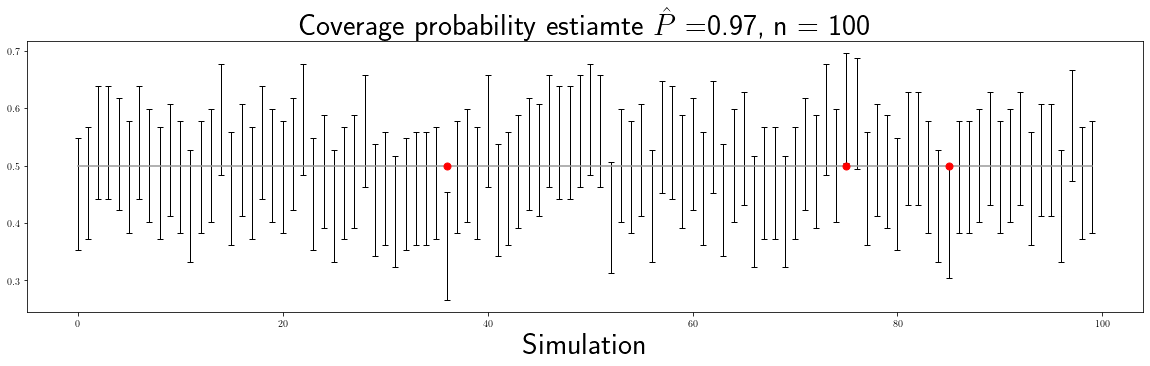

In [296]:
delta = 0.95 # Confidence level
mu = 0.5 # True but unknown exp parameter ~ N(0,1)
n = 100 # sample size
z_delta = rv.norm.ppf((1+delta)/2,0,1) # from formula ~N(0,1)
n_sim = np.int(1e2)  # number of simulations 

C = np.full([n_sim,2], np.nan) # Confidence interval
mu_in_c = np.full([n_sim,1], np.nan) # Confidence condition

mu_hat = np.full([n_sim,1], np.nan) 
J_inv = np.full([n_sim,1], np.nan) # 1/expected fisher info

#simulation
for i in range(n_sim):
  X = rv.bernoulli.rvs(mu, size = n)
  mu_hat[i] = np.mean(X)
  J_inv[i] = mu_hat[i]*(1-mu_hat[i])/n
  C[i,0] = mu_hat[i] - np.sqrt(J_inv[i])*z_delta
  C[i,1] = mu_hat[i] + np.sqrt(J_inv[i])*z_delta

  if mu >= C[i,0] and mu <= C[i,1]:
    mu_in_c[i] = 1
  else:
    mu_in_c[i] = 0

#cases where confidence interval (CI) is not covering mu
mu_nin_c = np.argwhere(mu_in_c == False)
arr=np.sqrt(J_inv)*z_delta
newarr = arr.reshape(-1)

#visualization
fig, ax = plt.subplots(1,figsize=(20, 5))
ax.plot ( range(n_sim),
            mu*np.ones([n_sim,1]),
            color = [.6,.6,.6])
ax.errorbar( range(n_sim),
               mu_hat,
               xerr = None,
               yerr =newarr ,
               linestyle = '',
               linewidth = 1,
               capsize = 3,
               color = [0,0,0]
               )
ax.plot( mu_nin_c[:,0],
           mu*np.ones([len(mu_nin_c),1]),
           ls = '',
           marker ='o',
           ms = 7,
           mfc = 'r',
           mec = 'r')

ax.set_title('Coverage probability estiamte $\hat{{P}} = ${0:1.2f}, n = {1:1.0f}'.format(np.mean(mu_in_c),n), fontsize = 30)
ax.set_xlabel('Simulation', fontsize = 30)
plt.show()

# (12) Hypothesis testing

1. By means of simulation show that T test of significance level alpha is an exact test

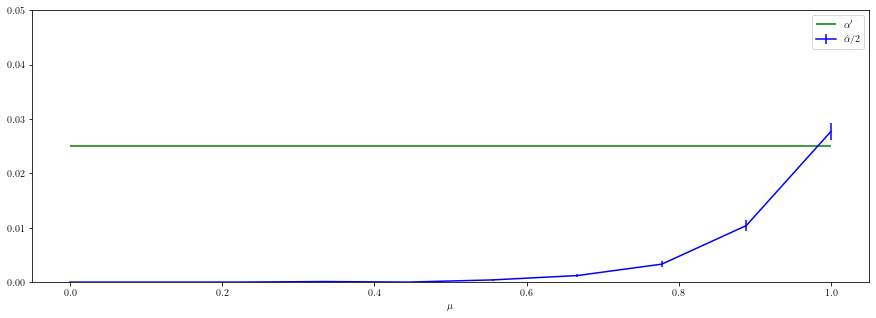

In [306]:

alpha  = 0.05
sample_size = 25
simulation = 10000
mu_0 = 1
theta_min=0
theta_max=mu_0
res=10
theta = np.linspace(theta_min,theta_max, res)

t_stat = np.full(repeats, np.nan)
df = sample_size-1  
c_alpha_prime  = rv.t.ppf(1 - alpha/2, df)  #Critical value for  two tailed test - alpha/2

sigmasqr = 2
 
alpha_estimate = np.full([10,2], np.nan)   # the outputs for thetas


for k, mu in np.ndenumerate(theta):
  test_output = np.full(repeats,np.nan)
  for s in range(simulation):    
    X = rv.norm.rvs(mu, np.sqrt(sigmasqr),size=sample_size)       
    mean_of_sample = np.mean(X)
    std_dev = np.sqrt(np.var(X, ddof = 1))  
    t_stat[s] = np.sqrt(sample_size)*((mean_of_sample - mu_0)/std_dev)
                          
    if t_stat[s] >= c_alpha_prime:  # reject null hypothesis
      test_output[s] = 1
    else:
      test_output[s] = 0

  # test size
  alpha_estimate[k[0],0] = np.mean(test_output)
  alpha_estimate[k[0],1] = np.std(test_output, ddof = 1)/ np.sqrt(simulation)
fig, ax = plt.subplots(1,figsize=(15, 5))
ax.errorbar(theta ,alpha_estimate[:,0], alpha_estimate[:,1],color='blue',
                       label = r'$\hat{\alpha}/2$')
ax.hlines(alpha/2, theta[0], theta[-1], color='green',label = r'$\alpha^\prime$')
#plt.plot(theta,alpha_est[:,0], label = r'$\hat{\alpha}$' )


ax.set_ylim(0, 0.05)
ax.set_xlabel('$\mu$')
ax.legend()
plt.show()

2. By means of simulation, demonstrate that the δ -confidence interval-based test for the expectation parameter of univariate Gaussian distribution is of significance level α' = 1 − δ .

In [311]:
mu_0 = 1
Sigmasqr = 2 
simulation= 1000
n=1000 #sample size


delta = 0.95 #Confidence level
t_delta = rv.t.ppf((1+delta)/2,n-1)
C = np.full([simulation,2], np.nan) #Confidence boundaries
output = np.full([simulation,1], np.nan)

for i in range(simulation):
  X = rv.norm.rvs(mu_0,np.sqrt(Sigmasqr), size = n)
  X_bar = np.mean(X)
  Sigmasqr = np.sqrt(np.var(X, ddof = 1))
  C[i,0] = X_bar - t_delta*(Sigmasqr/np.sqrt(n))
  C[i,1] = X_bar + t_delta*(Sigmasqr/np.sqrt(n))

  if mu_0 >= C[i,0] and mu_0 <= C[i,1]:
    output[i] = 0
  else:
    output[i] = 1

alpha_prime = np.mean(output)
print(" Significance level (alpha_prime):", alpha_prime, "1 - delta :", 1-delta , "are equal")

 Significance level (alpha_prime): 0.053 1 - delta : 0.050000000000000044 are equal


# (13) Conjugate inference

1. For n = 10, implement batch and recursive Bayesian estimation for the Beta-Binomial model. Compare the results based on identical samples.

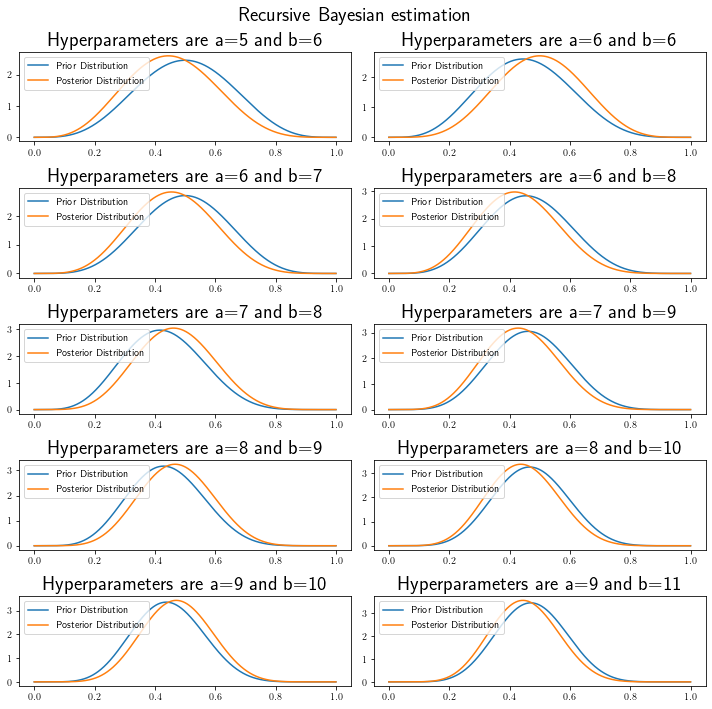

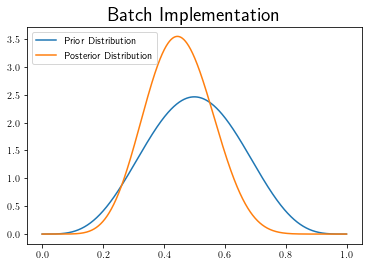

The updated hyperparameters are:
9 11
Hence we can conclude the Batch and recursive bayesian implementation yeilds similar results for beta binomial model


In [332]:
x_min=0
x_max=1
res=1000
a=5
b=5
x = np.linspace(x_min,x_max,res)
fx = beta.pdf(x, a, b)

old_a= None
old_b=None
#Update parameters:
def update_beta_params(a,b,n, num_successes,):
    old_a = a
    old_b = b
    a = a + num_successes
    b = b + n - num_successes
    return a,b
def get_pdf(a,b):
    x = np.linspace(x_min,x_max,res)
    fx = beta.pdf(x, a, b)
    dens_dict = {'x': x, 'fx': fx}
    return(dens_dict)
success_list = [0,1,0,0,1,0,1,0,1,0] #Sample/Experiments  n=10 
 
prior = get_pdf(a,b)
fig, axs = plt.subplots(5,2,figsize=(10, 10))
for kk, (ax ,x) in enumerate(zip(axs.reshape(-1),success_list)):    
  a,b=update_beta_params( a,b,n = 1, num_successes = x)
  posterior = get_pdf(a,b)

  #Plot prior and posterior
  ax.plot(prior['x'], prior['fx'])
  ax.plot(posterior['x'], posterior['fx'])
  ax.legend(['Prior Distribution', 'Posterior Distribution'], loc='upper left')
  ax.set_title('Hyperparameters are a={} and b={}'.format(a,b), fontsize=20)
  prior = posterior

plt.suptitle('Recursive Bayesian estimation',fontsize=20)
fig.tight_layout()
plt.show()



#batch implementation
a=5
b=5
prior = get_pdf(a,b)

success_list = [0,1,0,0,1,0,1,0,1,0] 

#Updation Description when processed in one batch:
#Prior = (5,5)
#Update formula: a+x,b+n-x 
#                where x=sum of all the x's and n= total no. of trials
#                i.e   x=sum[0,1,0,0,1,0,1,0,1,0] = 4   & n = 10

#Update o/p:     5+4,5+10-4  =  9,11

#Obtain data to update hyperparameters

#Update hyperparameters
a,b=update_beta_params(a,b,n = len(success_list), num_successes = sum(success_list))
posterior = get_pdf(a,b)

#Plot prior and posterior
plt.plot(prior['x'], prior['fx'])
plt.plot(posterior['x'], posterior['fx'])
plt.legend(['Prior Distribution', 'Posterior Distribution'], loc='upper left')
plt.title('Batch Implementation',fontsize=20)
plt.show()
print("The updated hyperparameters are:")
print(a, b)
print('Hence we can conclude the Batch and recursive bayesian implementation yeilds similar results for beta binomial model')

# (14) Numerical methods

# 1. Estimate the expected value of a Beta (α, β) for varying values of α and β by means of Monte Carlo integration by using a Beta distribution random number generator. Compare the results to the true expected values.


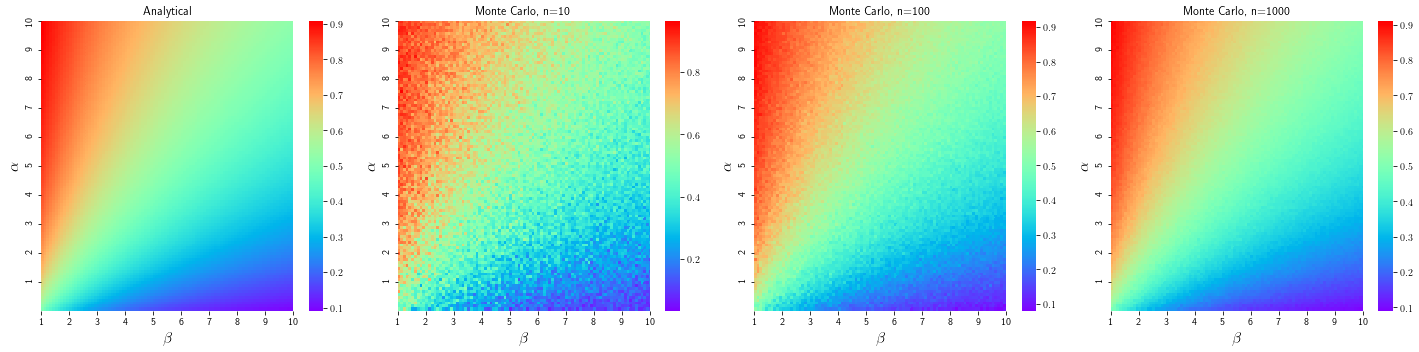

In [172]:
n=100
sizes=[10,100,1000]
a=np.linspace(1,10,n)#alpha
b=np.linspace(1,10,n) #beta
e_a=np.full([n,n,len(sizes)+1],np.nan)
#e_a=np.zeros((n,n,len(sizes)+1))
for i in range(len(alpha)):
    for j in range(len(beta)):
        e_a[n-i-1,j,0]=a[i]/(a[i]+b[j])
        #print(e_a[n-i-1,j,0])
        for size_n in sizes:
            random_samples=rv.beta.rvs(a[i],b[j],size=size_n)
            e_a[n-i-1,j,sizes.index(size_n)+1]=np.mean(random_samples)
            #print(n-i-1,j,sizes.index(size)+1,e_a[n-i-1,j,sizes.index(size)+1])
gs=gridspec.GridSpec(1,4)
fig=plt.figure(figsize=(20,5))
for i in range(len(sizes)+1):
    ax=fig.add_subplot(gs[0,i])
    ax=sns.heatmap(e_a[:,:,i],cmap='rainbow',cbar=True)
    if i==0:
        ax.set_title(titles[i])
    else:
        ax.set_title(titles[1].format(sizes[i-1]))
    #ax.set_aspect('equal')
    ax.set_xlabel(r'$\beta$',fontsize=16)
    ax.set_xticks(ticks=range(0,n,10))
    ax.set_xticklabels(range(1,11))
    ax.set_ylabel(r'$\alpha$',fontsize=16)
    ax.set_yticks(ticks=range(0,n,10))
    ax.set_yticklabels(range(10,0,-1))
    ylims1=ax.get_ylim()
    ylimis1=(ylims1[0]-10,ylims1[1])
    ax.set_ylim(ylims1)
    xlims1=ax.get_xlim()
    xlims1=(xlims1[0],xlims1[1]-10)
    ax.set_xlim(xlims1)
fig.tight_layout()
plt.show()
    

# 2. Estimate the expected value of a Beta (α, β) for varying values of α and β by means of Monte Carlo integration using an importance sampling scheme and a uniform random number generator.


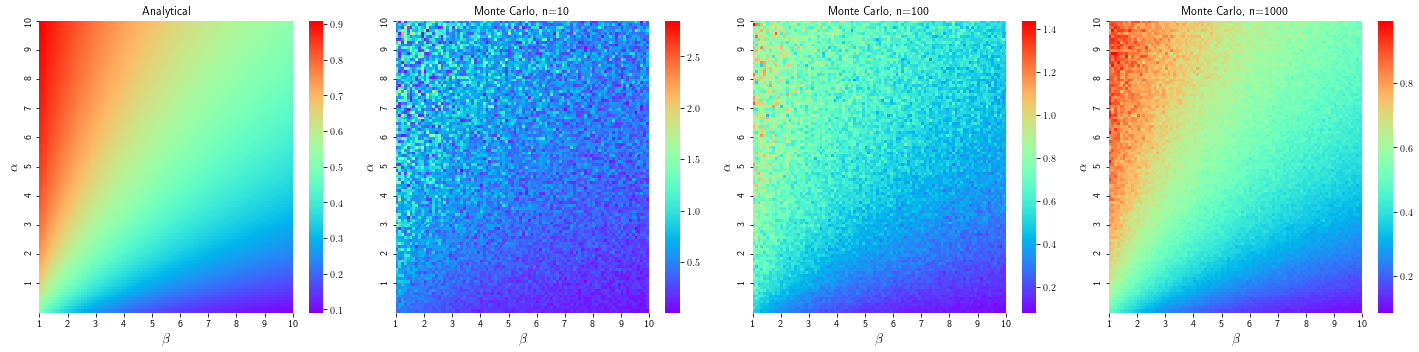

In [174]:
n=100
sizes=[10,100,1000]
alpha=np.linspace(1,10,n)
beta=np.linspace(1,10,n)
#samples=np.full([n,n,len(sizes)+1],np.nan)
samples=np.zeros((n,n,len(sizes)+1))
for i in range(len(alpha)):
    for j in range(len(beta)):
        samples[n-i-1,j,0]=alpha[i]/(alpha[i]+beta[j])
        for size in sizes:
            X=uniform.rvs(size=size)
            samples[n-i-1,j,sizes.index(size)+1]=1/size*np.sum(X*(rv.beta.pdf(X,alpha[i],beta[j])))
gs=gridspec.GridSpec(1,4)
fig=plt.figure(figsize=(20,5))
for i in range(len(sizes)+1):
    ax=fig.add_subplot(gs[0,i])
    ax.clear()
    ax=sns.heatmap(samples[:,:,i],cmap='rainbow',cbar=True)
    if i==0:
        ax.set_title(titles[i])
    else:
        ax.set_title(titles[1].format(sizes[i-1]))
    #ax.set_aspect('equal')
    ax.set_xlabel(r'$\beta$',fontsize=14)
    ax.set_xticks(ticks=range(0,n,10))
    ax.set_xticklabels(range(1,11))
    ax.set_ylabel(r'$\alpha$',fontsize=14)
    ax.set_yticks(ticks=range(0,n,10))
    ax.set_yticklabels(range(10,0,-1))
    ylims1=ax.get_ylim()
    ylimis1=(ylims1[0]-10,ylims1[1])
    ax.set_ylim(ylims1)
    xlims1=ax.get_xlim()
    xlims1=(xlims1[0],xlims1[1]-10)
    ax.set_xlim(xlims1)
fig.tight_layout()
plt.show()
    

# 3. Use an acceptance-rejection algorithm to sample random numbers from Beta (2, 6) .

In [197]:
n=1000
y=np.linspace(0,1,n) #y-space
a=2 #alpha
b=6 #beta
mu=0
sigmasqr=1
cons=9 #scale constant
desired_samples=1000
Y=np.full([desired_samples,1],np.nan)
o_s=0 #obtained samples
while o_s<desired_samples:
    x=rv.norm.rvs(mu,sigmasqr)
    u=rv.uniform.rvs()
    #condition
    if u<=rv.beta.pdf(x,a,b)/(cons*rv.norm.pdf(x,mu,sigmasqr)):
        Y[o_s]=x
        o_s+=1 #increase count

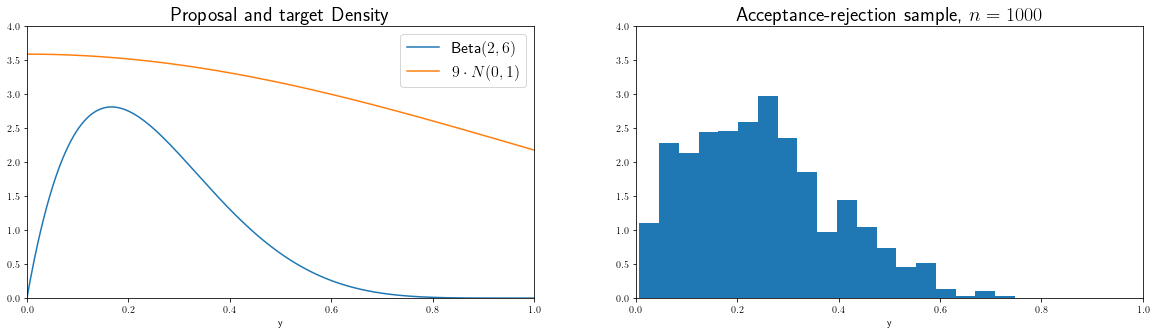

In [198]:
fig, axs = plt.subplots(1,2,figsize=(20, 5))
for kk, ax in enumerate(axs.reshape(-1)):
    if kk==0:
        ax.plot(y,rv.beta.pdf(y,a,b),label=r'Beta$({},{})$'.format(a,b))
        ax.plot(y,cons*rv.norm.pdf(y,mu,sigmasqr),label=r'${}\cdot N({},{})$'.format(cons,mu,sigmasqr))
        ax.set_title('Proposal and target Density',fontsize=20)
        ax.set_xlim(0,1)
        ax.set_ylim(0,4)
        ax.set_xlabel(r'y')
        ax.legend(loc='upper right',fontsize=16)
    else:
        ax.hist(Y,density=True,bins='auto',label=r'Beta$({},{})$'.format(a,b))
        ax.set_title('Acceptance-rejection sample, $n={}$'.format(desired_samples),fontsize=20)
        ax.set_xlim(0,1)
        ax.set_ylim(0,4)
        ax.set_xlabel(r'y')
plt.show()